In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [49]:
def create_universe_dataframe(universe_name, average_metrics, period_metrics):
    # Create a DataFrame for average metrics
    avg_df = pd.DataFrame(average_metrics).T
    avg_df['Type'] = 'Average'
    avg_df.reset_index(inplace=True)
    avg_df.rename(columns={'index': 'Strategy'}, inplace=True)
    
    # Add 'Universe' to average metrics
    avg_df['Universe'] = universe_name
    
    # Melt the average metrics to long format
    avg_df_melted = avg_df.melt(
        id_vars=['Strategy', 'Type', 'Universe'],
        var_name='Metric',
        value_name='Value'
    )
    
    # Prepare period metrics
    period_data = []
    for period in period_metrics:
        period_num = period['Period']
        for strategy, metrics in period.items():
            if strategy == 'Period':
                continue
            for metric, value in metrics.items():
                period_data.append({
                    'Period': f'Period {period_num}',
                    'Strategy': strategy,
                    'Metric': metric,
                    'Value': value,
                    'Type': 'Period',
                    'Universe': universe_name
                })
    
    period_df = pd.DataFrame(period_data)
    
    # Combine average and period metrics
    combined_df = pd.concat([avg_df_melted, period_df], ignore_index=True)
    
    return combined_df


In [50]:
def radar_chart_average_metrics(df, universe, metrics):
    # Filter average metrics for the specified universe
    avg_metrics = df[(df['Universe'] == universe) & (df['Type'] == 'Average')]
    pivot_df = avg_metrics.pivot(index='Strategy', columns='Metric', values='Value').reset_index()
    
    # Number of variables
    num_vars = len(metrics)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    # Initialize the radar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for _, row in pivot_df.iterrows():
        values = row[metrics].tolist()
        values += values[:1]  # Complete the loop
        ax.plot(angles, values, label=row['Strategy'])
        ax.fill(angles, values, alpha=0.1)
    
    # Set the labels for each axis
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    
    # Set the range for radial axis
    ax.set_rlabel_position(30)
    ax.set_ylim(0, max(pivot_df[metrics].max()) * 1.1)
    
    plt.title(f'Multi-Metric Comparison for {universe}', y=1.08)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()


In [51]:
def plot_metrics_over_periods(df, universe, metrics, strategies):
    """
    Plots specified metrics over periods for each strategy within a universe.
    
    Parameters:
        df (pd.DataFrame): Combined DataFrame containing all metrics.
        universe (str): The universe to plot.
        metrics (list): List of metrics to plot.
        strategies (list): List of strategies to include.
    """
    for metric in metrics:
        plt.figure(figsize=(12, 6))
        sns.lineplot(
            data=df[
                (df['Universe'] == universe) &
                (df['Type'] == 'Period') &
                (df['Metric'] == metric) &
                (df['Strategy'].isin(strategies))
            ],
            x='Period',
            y='Value',
            hue='Strategy',
            marker='o'
        )
        plt.title(f'{metric} Over Periods for {universe}')
        plt.xlabel('Period')
        plt.ylabel(metric)
        plt.legend(title='Strategy')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [52]:
# --- Universe 1: [AGG, DBC, VTI, ^VIX] ---
universe1_average_metrics = {
    'LSTM': {
        'Annualized Return': 0.3785,
        'Annualized Std Dev': 0.1472,
        'Sharpe Ratio': 2.2911,
        'Sortino Ratio': 4.6011,
        'Max Drawdown': 0.0745,
        '% Positive Returns': 52.5618,
        'Profit/Loss Ratio': 1.4557
    },
    'MVO': {
        'Annualized Return': 0.2175,
        'Annualized Std Dev': 0.1481,
        'Sharpe Ratio': 2.0634,
        'Sortino Ratio': 3.1477,
        'Max Drawdown': 0.1543,
        '% Positive Returns': 61.2302,
        'Profit/Loss Ratio': 1.0818
    },
    'MD': {
        'Annualized Return': 0.1152,
        'Annualized Std Dev': 0.0584,
        'Sharpe Ratio': 1.8152,
        'Sortino Ratio': 2.8024,
        'Max Drawdown': 0.0558,
        '% Positive Returns': 56.8503,
        'Profit/Loss Ratio': 1.1013
    },
    'EW': {
        'Annualized Return': 0.2231,
        'Annualized Std Dev': 0.2844,
        'Sharpe Ratio': 0.7872,
        'Sortino Ratio': 1.6703,
        'Max Drawdown': 0.1648,
        '% Positive Returns': 46.8071,
        'Profit/Loss Ratio': 1.3325
    }
}

universe1_period_metrics = [
    {
        'Period': 1,
        'LSTM': {
            'Annualized Return': 0.3895,
            'Annualized Std Dev': 0.1335,
            'Sharpe Ratio': 2.5281,
            'Sortino Ratio': 4.7725,
            'Max Drawdown': 0.0570,
            '% Positive Returns': 52.6000,
            'Profit/Loss Ratio': 1.4539
        },
        'MVO': {
            'Annualized Return': 0.2056,
            'Annualized Std Dev': 0.0451,
            'Sharpe Ratio': 4.1562,
            'Sortino Ratio': 9.1380,
            'Max Drawdown': 0.0217,
            '% Positive Returns': 59.7194,
            'Profit/Loss Ratio': 1.5786
        },
        'MD': {
            'Annualized Return': 0.0953,
            'Annualized Std Dev': 0.0426,
            'Sharpe Ratio': 2.1426,
            'Sortino Ratio': 3.2906,
            'Max Drawdown': 0.0265,
            '% Positive Returns': 55.9118,
            'Profit/Loss Ratio': 1.1320
        },
        'EW': {
            'Annualized Return': 0.2362,
            'Annualized Std Dev': 0.2473,
            'Sharpe Ratio': 0.9771,
            'Sortino Ratio': 2.1000,
            'Max Drawdown': 0.1409,
            '% Positive Returns': 48.0000,
            'Profit/Loss Ratio': 1.2874
        }
    },
    {
        'Period': 2,
        'LSTM': {
            'Annualized Return': 0.4330,
            'Annualized Std Dev': 0.1671,
            'Sharpe Ratio': 2.2349,
            'Sortino Ratio': 5.0011,
            'Max Drawdown': 0.0582,
            '% Positive Returns': 50.0000,
            'Profit/Loss Ratio': 1.5419
        },
        'MVO': {
            'Annualized Return': 0.2040,
            'Annualized Std Dev': 0.0407,
            'Sharpe Ratio': 4.5779,
            'Sortino Ratio': 6.7060,
            'Max Drawdown': 0.0201,
            '% Positive Returns': 64.6707,
            'Profit/Loss Ratio': 1.2324
        },
        'MD': {
            'Annualized Return': 0.1304,
            'Annualized Std Dev': 0.0403,
            'Sharpe Ratio': 3.0517,
            'Sortino Ratio': 4.7182,
            'Max Drawdown': 0.0264,
            '% Positive Returns': 59.6806,
            'Profit/Loss Ratio': 1.1412
        },
        'EW': {
            'Annualized Return': 0.1516,
            'Annualized Std Dev': 0.2604,
            'Sharpe Ratio': 0.6694,
            'Sortino Ratio': 1.2509,
            'Max Drawdown': 0.1567,
            '% Positive Returns': 45.6175,
            'Profit/Loss Ratio': 1.3471
        }
    },
    {
        'Period': 3,
        'LSTM': {
            'Annualized Return': 0.3973,
            'Annualized Std Dev': 0.1369,
            'Sharpe Ratio': 2.5011,
            'Sortino Ratio': 4.7249,
            'Max Drawdown': 0.0685,
            '% Positive Returns': 53.1873,
            'Profit/Loss Ratio': 1.3671
        },
        'MVO': {
            'Annualized Return': 0.1732,
            'Annualized Std Dev': 0.1602,
            'Sharpe Ratio': 1.0662,
            'Sortino Ratio': 1.0957,
            'Max Drawdown': 0.1444,
            '% Positive Returns': 58.8822,
            'Profit/Loss Ratio': 1.0658
        },
        'MD': {
            'Annualized Return': 0.0678,
            'Annualized Std Dev': 0.0439,
            'Sharpe Ratio': 1.4764,
            'Sortino Ratio': 1.9924,
            'Max Drawdown': 0.0352,
            '% Positive Returns': 57.0858,
            'Profit/Loss Ratio': 0.9867
        },
        'EW': {
            'Annualized Return': 0.1550,
            'Annualized Std Dev': 0.2985,
            'Sharpe Ratio': 0.6240,
            'Sortino Ratio': 1.2444,
            'Max Drawdown': 0.1775,
            '% Positive Returns': 48.6056,
            'Profit/Loss Ratio': 1.1819
        }
    },
    {
        'Period': 4,
        'LSTM': {
            'Annualized Return': 0.4207,
            'Annualized Std Dev': 0.1322,
            'Sharpe Ratio': 2.6167,
            'Sortino Ratio': 7.5422,
            'Max Drawdown': 0.0336,
            '% Positive Returns': 51.4000,
            'Profit/Loss Ratio': 1.6912
        },
        'MVO': {
            'Annualized Return': 0.2939,
            'Annualized Std Dev': 0.2463,
            'Sharpe Ratio': 1.1082,
            'Sortino Ratio': 1.2755,
            'Max Drawdown': 0.2004,
            '% Positive Returns': 62.3246,
            'Profit/Loss Ratio': 1.0007
        },
        'MD': {
            'Annualized Return': 0.1093,
            'Annualized Std Dev': 0.0455,
            'Sharpe Ratio': 1.9930,
            'Sortino Ratio': 2.8811,
            'Max Drawdown': 0.0412,
            '% Positive Returns': 57.5150,
            'Profit/Loss Ratio': 1.1525
        },
        'EW': {
            'Annualized Return': 0.3554,
            'Annualized Std Dev': 0.3558,
            'Sharpe Ratio': 0.9828,
            'Sortino Ratio': 2.2472,
            'Max Drawdown': 0.1765,
            '% Positive Returns': 48.4000,
            'Profit/Loss Ratio': 1.3326
        }
    },
    {
        'Period': 5,
        'LSTM': {
            'Annualized Return': 0.3024,
            'Annualized Std Dev': 0.0868,
            'Sharpe Ratio': 2.9517,
            'Sortino Ratio': 3.4748,
            'Max Drawdown': 0.0963,
            '% Positive Returns': 60.8350,
            'Profit/Loss Ratio': 1.3035
        },
        'MVO': {
            'Annualized Return': 0.2564,
            'Annualized Std Dev': 0.1072,
            'Sharpe Ratio': 2.0729,
            'Sortino Ratio': 2.2179,
            'Max Drawdown': 0.1179,
            '% Positive Returns': 64.7410,
            'Profit/Loss Ratio': 0.9725
        },
        'MD': {
            'Annualized Return': 0.1272,
            'Annualized Std Dev': 0.0957,
            'Sharpe Ratio': 1.1745,
            'Sortino Ratio': 1.2145,
            'Max Drawdown': 0.1274,
            '% Positive Returns': 60.3586,
            'Profit/Loss Ratio': 0.9119
        },
        'EW': {
            'Annualized Return': 0.3071,
            'Annualized Std Dev': 0.2885,
            'Sharpe Ratio': 1.0288,
            'Sortino Ratio': 2.3462,
            'Max Drawdown': 0.1779,
            '% Positive Returns': 47.3161,
            'Profit/Loss Ratio': 1.3559
        }
    },
    {
        'Period': 6,
        'LSTM': {
            'Annualized Return': -0.1537,
            'Annualized Std Dev': 0.3405,
            'Sharpe Ratio': -0.3490,
            'Sortino Ratio': -0.5076,
            'Max Drawdown': 0.4637,
            '% Positive Returns': 50.6986,
            'Profit/Loss Ratio': 0.9200
        },
        'MVO': {
            'Annualized Return': 0.0017,
            'Annualized Std Dev': 0.3005,
            'Sharpe Ratio': 0.1223,
            'Sortino Ratio': 0.1954,
            'Max Drawdown': 0.4065,
            '% Positive Returns': 48.6000,
            'Profit/Loss Ratio': 1.0817
        },
        'MD': {
            'Annualized Return': -0.0739,
            'Annualized Std Dev': 0.2974,
            'Sharpe Ratio': -0.1428,
            'Sortino Ratio': -0.2088,
            'Max Drawdown': 0.4276,
            '% Positive Returns': 52.6000,
            'Profit/Loss Ratio': 0.8847
        },
        'EW': {
            'Annualized Return': -0.0467,
            'Annualized Std Dev': 0.2924,
            'Sharpe Ratio': -0.0515,
            'Sortino Ratio': -0.0752,
            'Max Drawdown': 0.3841,
            '% Positive Returns': 52.4950,
            'Profit/Loss Ratio': 0.9023
        }
    },
    {
        'Period': 7,
        'LSTM': {
            'Annualized Return': 0.3972,
            'Annualized Std Dev': 0.1542,
            'Sharpe Ratio': 1.9202,
            'Sortino Ratio': 4.1846,
            'Max Drawdown': 0.0740,
            '% Positive Returns': 50.2101,
            'Profit/Loss Ratio': 1.4659
        },
        'MVO': {
            'Annualized Return': 0.1219,
            'Annualized Std Dev': 0.1817,
            'Sharpe Ratio': 0.4479,
            'Sortino Ratio': 0.4340,
            'Max Drawdown': 0.2482,
            '% Positive Returns': 57.4737,
            'Profit/Loss Ratio': 0.8850
        },
        'MD': {
            'Annualized Return': 0.2168,
            'Annualized Std Dev': 0.0681,
            'Sharpe Ratio': 2.1747,
            'Sortino Ratio': 4.4177,
            'Max Drawdown': 0.0345,
            '% Positive Returns': 56.0000,
            'Profit/Loss Ratio': 1.2931
        },
        'EW': {
            'Annualized Return': 0.4371,
            'Annualized Std Dev': 0.2082,
            'Sharpe Ratio': 1.6049,
            'Sortino Ratio': 2.4445,
            'Max Drawdown': 0.1533,
            '% Positive Returns': 56.7227,
            'Profit/Loss Ratio': 1.0320
        }
    }
]

# --- Universe 2: [AAPL, MSFT, AMZN, GOOG] ---
universe2_average_metrics = {
    'LSTM': {
        'Annualized Return': 0.2834,
        'Annualized Std Dev': 0.2540,
        'Sharpe Ratio': 1.0776,
        'Sortino Ratio': 1.6081,
        'Max Drawdown': 0.2434,
        '% Positive Returns': 54.0700,
        'Profit/Loss Ratio': 1.0445
    },
    'MVO': {
        'Annualized Return': 0.2682,
        'Annualized Std Dev': 0.2586,
        'Sharpe Ratio': 0.9548,
        'Sortino Ratio': 1.3296,
        'Max Drawdown': 0.2299,
        '% Positive Returns': 53.5921,
        'Profit/Loss Ratio': 1.0368
    },
    'MD': {
        'Annualized Return': 0.2667,
        'Annualized Std Dev': 0.2266,
        'Sharpe Ratio': 1.1037,
        'Sortino Ratio': 1.5605,
        'Max Drawdown': 0.2273,
        '% Positive Returns': 55.6633,
        'Profit/Loss Ratio': 0.9765
    },
    'EW': {
        'Annualized Return': 0.2612,
        'Annualized Std Dev': 0.2292,
        'Sharpe Ratio': 1.0769,
        'Sortino Ratio': 1.5155,
        'Max Drawdown': 0.2134,
        '% Positive Returns': 55.5757,
        'Profit/Loss Ratio': 0.9776
    }
}

universe2_period_metrics = [
    {
        'Period': 1,
        'LSTM': {
            'Annualized Return': 0.3520,
            'Annualized Std Dev': 0.2509,
            'Sharpe Ratio': 1.3248,
            'Sortino Ratio': 2.2920,
            'Max Drawdown': 0.1821,
            '% Positive Returns': 53.0000,
            'Profit/Loss Ratio': 1.1126
        },
        'MVO': {
            'Annualized Return': 0.0798,
            'Annualized Std Dev': 0.2564,
            'Sharpe Ratio': 0.4261,
            'Sortino Ratio': 0.5585,
            'Max Drawdown': 0.1877,
            '% Positive Returns': 52.9058,
            'Profit/Loss Ratio': 0.9588
        },
        'MD': {
            'Annualized Return': 0.1191,
            'Annualized Std Dev': 0.2111,
            'Sharpe Ratio': 0.6358,
            'Sortino Ratio': 0.9310,
            'Max Drawdown': 0.1720,
            '% Positive Returns': 53.9078,
            'Profit/Loss Ratio': 0.9536
        },
        'EW': {
            'Annualized Return': 0.1363,
            'Annualized Std Dev': 0.2135,
            'Sharpe Ratio': 0.7026,
            'Sortino Ratio': 1.0304,
            'Max Drawdown': 0.1627,
            '% Positive Returns': 54.4000,
            'Profit/Loss Ratio': 0.9454
        }
    },
    {
        'Period': 2,
        'LSTM': {
            'Annualized Return': 0.2346,
            'Annualized Std Dev': 0.2356,
            'Sharpe Ratio': 1.0120,
            'Sortino Ratio': 1.3212,
            'Max Drawdown': 0.1822,
            '% Positive Returns': 52.1912,
            'Profit/Loss Ratio': 1.0967
        },
        'MVO': {
            'Annualized Return': 0.3497,
            'Annualized Std Dev': 0.1853,
            'Sharpe Ratio': 1.7097,
            'Sortino Ratio': 2.6924,
            'Max Drawdown': 0.1046,
            '% Positive Returns': 53.6926,
            'Profit/Loss Ratio': 1.1475
        },
        'MD': {
            'Annualized Return': 0.3221,
            'Annualized Std Dev': 0.1598,
            'Sharpe Ratio': 1.8256,
            'Sortino Ratio': 2.8684,
            'Max Drawdown': 0.0938,
            '% Positive Returns': 56.2874,
            'Profit/Loss Ratio': 1.0543
        },
        'EW': {
            'Annualized Return': 0.2398,
            'Annualized Std Dev': 0.1598,
            'Sharpe Ratio': 1.4235,
            'Sortino Ratio': 2.1097,
            'Max Drawdown': 0.0929,
            '% Positive Returns': 55.5777,
            'Profit/Loss Ratio': 1.0141
        }
    },
    {
        'Period': 3,
        'LSTM': {
            'Annualized Return': 0.3283,
            'Annualized Std Dev': 0.2371,
            'Sharpe Ratio': 1.3073,
            'Sortino Ratio': 2.1916,
            'Max Drawdown': 0.1371,
            '% Positive Returns': 51.1952,
            'Profit/Loss Ratio': 1.2281
        },
        'MVO': {
            'Annualized Return': 0.2696,
            'Annualized Std Dev': 0.2423,
            'Sharpe Ratio': 1.0987,
            'Sortino Ratio': 1.7062,
            'Max Drawdown': 0.2196,
            '% Positive Returns': 51.4970,
            'Profit/Loss Ratio': 1.1460
        },
        'MD': {
            'Annualized Return': 0.1773,
            'Annualized Std Dev': 0.2134,
            'Sharpe Ratio': 0.8638,
            'Sortino Ratio': 1.2182,
            'Max Drawdown': 0.2195,
            '% Positive Returns': 53.2934,
            'Profit/Loss Ratio': 1.0264
        },
        'EW': {
            'Annualized Return': 0.2654,
            'Annualized Std Dev': 0.2119,
            'Sharpe Ratio': 1.2090,
            'Sortino Ratio': 1.8083,
            'Max Drawdown': 0.1784,
            '% Positive Returns': 52.7888,
            'Profit/Loss Ratio': 1.1151
        }
    },
    {
        'Period': 4,
        'LSTM': {
            'Annualized Return': 0.2599,
            'Annualized Std Dev': 0.2178,
            'Sharpe Ratio': 1.1049,
            'Sortino Ratio': 1.4284,
            'Max Drawdown': 0.3031,
            '% Positive Returns': 56.0000,
            'Profit/Loss Ratio': 0.9743
        },
        'MVO': {
            'Annualized Return': 0.1952,
            'Annualized Std Dev': 0.2276,
            'Sharpe Ratio': 0.8357,
            'Sortino Ratio': 1.0283,
            'Max Drawdown': 0.2061,
            '% Positive Returns': 55.5110,
            'Profit/Loss Ratio': 0.9431
        },
        'MD': {
            'Annualized Return': 0.2662,
            'Annualized Std Dev': 0.2108,
            'Sharpe Ratio': 1.1584,
            'Sortino Ratio': 1.4674,
            'Max Drawdown': 0.2799,
            '% Positive Returns': 57.5150,
            'Profit/Loss Ratio': 0.9253
        },
        'EW': {
            'Annualized Return': 0.2623,
            'Annualized Std Dev': 0.2159,
            'Sharpe Ratio': 1.1214,
            'Sortino Ratio': 1.4156,
            'Max Drawdown': 0.2634,
            '% Positive Returns': 58.0000,
            'Profit/Loss Ratio': 0.9040
        }
    },
    {
        'Period': 5,
        'LSTM': {
            'Annualized Return': 0.5589,
            'Annualized Std Dev': 0.2918,
            'Sharpe Ratio': 1.6280,
            'Sortino Ratio': 3.4748,
            'Max Drawdown': 0.0963,
            '% Positive Returns': 60.8350,
            'Profit/Loss Ratio': 1.3035
        },
        'MVO': {
            'Annualized Return': 0.7711,
            'Annualized Std Dev': 0.3409,
            'Sharpe Ratio': 1.8147,
            'Sortino Ratio': 2.2392,
            'Max Drawdown': 0.2861,
            '% Positive Returns': 57.5697,
            'Profit/Loss Ratio': 1.0379
        },
        'MD': {
            'Annualized Return': 0.6316,
            'Annualized Std Dev': 0.2886,
            'Sharpe Ratio': 1.8014,
            'Sortino Ratio': 2.2448,
            'Max Drawdown': 0.2467,
            '% Positive Returns': 58.5657,
            'Profit/Loss Ratio': 0.9931
        },
        'EW': {
            'Annualized Return': 0.5340,
            'Annualized Std Dev': 0.3024,
            'Sharpe Ratio': 1.5286,
            'Sortino Ratio': 1.8753,
            'Max Drawdown': 0.2591,
            '% Positive Returns': 59.0457,
            'Profit/Loss Ratio': 0.9305
        }
    },
    {
        'Period': 6,
        'LSTM': {
            'Annualized Return': -0.1537,
            'Annualized Std Dev': 0.3405,
            'Sharpe Ratio': -0.3490,
            'Sortino Ratio': -0.5076,
            'Max Drawdown': 0.4637,
            '% Positive Returns': 50.6986,
            'Profit/Loss Ratio': 0.9200
        },
        'MVO': {
            'Annualized Return': 0.0017,
            'Annualized Std Dev': 0.3005,
            'Sharpe Ratio': 0.1223,
            'Sortino Ratio': 0.1954,
            'Max Drawdown': 0.4065,
            '% Positive Returns': 48.6000,
            'Profit/Loss Ratio': 1.0817
        },
        'MD': {
            'Annualized Return': -0.0739,
            'Annualized Std Dev': 0.2974,
            'Sharpe Ratio': -0.1428,
            'Sortino Ratio': -0.2088,
            'Max Drawdown': 0.4276,
            '% Positive Returns': 52.6000,
            'Profit/Loss Ratio': 0.8847
        },
        'EW': {
            'Annualized Return': -0.0467,
            'Annualized Std Dev': 0.2924,
            'Sharpe Ratio': -0.0515,
            'Sortino Ratio': -0.0752,
            'Max Drawdown': 0.3841,
            '% Positive Returns': 52.4950,
            'Profit/Loss Ratio': 0.9023
        }
    },
    {
        'Period': 7,
        'LSTM': {
            'Annualized Return': 0.3972,
            'Annualized Std Dev': 0.1542,
            'Sharpe Ratio': 1.9202,
            'Sortino Ratio': 4.1846,
            'Max Drawdown': 0.0740,
            '% Positive Returns': 50.2101,
            'Profit/Loss Ratio': 1.4659
        },
        'MVO': {
            'Annualized Return': 0.1219,
            'Annualized Std Dev': 0.1817,
            'Sharpe Ratio': 0.4479,
            'Sortino Ratio': 0.4340,
            'Max Drawdown': 0.2482,
            '% Positive Returns': 57.4737,
            'Profit/Loss Ratio': 0.8850
        },
        'MD': {
            'Annualized Return': 0.2168,
            'Annualized Std Dev': 0.0681,
            'Sharpe Ratio': 2.1747,
            'Sortino Ratio': 4.4177,
            'Max Drawdown': 0.0345,
            '% Positive Returns': 56.0000,
            'Profit/Loss Ratio': 1.2931
        },
        'EW': {
            'Annualized Return': 0.4371,
            'Annualized Std Dev': 0.2082,
            'Sharpe Ratio': 1.6049,
            'Sortino Ratio': 2.4445,
            'Max Drawdown': 0.1533,
            '% Positive Returns': 56.7227,
            'Profit/Loss Ratio': 1.0320
        }
    }
]

# --- Universe 3: [O, AMT, SPG, PLD, VTR] ---
universe3_average_metrics = {
    'LSTM': {
        'Annualized Return': 0.1255,
        'Annualized Std Dev': 0.2308,
        'Sharpe Ratio': 0.6196,
        'Sortino Ratio': 0.8811,
        'Max Drawdown': 0.2401,
        '% Positive Returns': 53.7266,
        'Profit/Loss Ratio': 0.9711
    },
    'MVO': {
        'Annualized Return': 0.1309,
        'Annualized Std Dev': 0.2225,
        'Sharpe Ratio': 0.5958,
        'Sortino Ratio': 0.8584,
        'Max Drawdown': 0.2504,
        '% Positive Returns': 54.0762,
        'Profit/Loss Ratio': 0.9447
    },
    'MD': {
        'Annualized Return': 0.1038,
        'Annualized Std Dev': 0.2097,
        'Sharpe Ratio': 0.5746,
        'Sortino Ratio': 0.7955,
        'Max Drawdown': 0.2601,
        '% Positive Returns': 54.6714,
        'Profit/Loss Ratio': 0.9297
    },
    'EW': {
        'Annualized Return': 0.1138,
        'Annualized Std Dev': 0.2135,
        'Sharpe Ratio': 0.5990,
        'Sortino Ratio': 0.8164,
        'Max Drawdown': 0.2620,
        '% Positive Returns': 54.4004,
        'Profit/Loss Ratio': 0.9464
    }
}

universe3_period_metrics = [
    {
        'Period': 1,
        'LSTM': {
            'Annualized Return': 0.2978,
            'Annualized Std Dev': 0.2392,
            'Sharpe Ratio': 1.2076,
            'Sortino Ratio': 1.6499,
            'Max Drawdown': 0.1722,
            '% Positive Returns': 54.6000,
            'Profit/Loss Ratio': 1.0282
        },
        'MVO': {
            'Annualized Return': 0.1131,
            'Annualized Std Dev': 0.2146,
            'Sharpe Ratio': 0.6032,
            'Sortino Ratio': 0.8719,
            'Max Drawdown': 0.2010,
            '% Positive Returns': 53.9078,
            'Profit/Loss Ratio': 0.9495
        },
        'MD': {
            'Annualized Return': 0.1960,
            'Annualized Std Dev': 0.2005,
            'Sharpe Ratio': 0.9904,
            'Sortino Ratio': 1.2969,
            'Max Drawdown': 0.1895,
            '% Positive Returns': 57.3146,
            'Profit/Loss Ratio': 0.8901
        },
        'EW': {
            'Annualized Return': 0.1821,
            'Annualized Std Dev': 0.2153,
            'Sharpe Ratio': 0.8824,
            'Sortino Ratio': 0.7598,
            'Max Drawdown': 0.1968,
            '% Positive Returns': 53.6000,
            'Profit/Loss Ratio': 0.9402
        }
    },
    {
        'Period': 2,
        'LSTM': {
            'Annualized Return': 0.1553,
            'Annualized Std Dev': 0.1586,
            'Sharpe Ratio': 0.9875,
            'Sortino Ratio': 1.5322,
            'Max Drawdown': 0.1822,
            '% Positive Returns': 52.1912,
            'Profit/Loss Ratio': 1.0824
        },
        'MVO': {
            'Annualized Return': 0.0928,
            'Annualized Std Dev': 0.1565,
            'Sharpe Ratio': 0.6434,
            'Sortino Ratio': 0.8690,
            'Max Drawdown': 0.2973,
            '% Positive Returns': 54.4910,
            'Profit/Loss Ratio': 0.9249
        },
        'MD': {
            'Annualized Return': 0.1747,
            'Annualized Std Dev': 0.1468,
            'Sharpe Ratio': 1.1678,
            'Sortino Ratio': 1.6250,
            'Max Drawdown': 0.2158,
            '% Positive Returns': 53.2934,
            'Profit/Loss Ratio': 1.0739
        },
        'EW': {
            'Annualized Return': 0.1372,
            'Annualized Std Dev': 0.1455,
            'Sharpe Ratio': 0.9543,
            'Sortino Ratio': 1.3157,
            'Max Drawdown': 0.2330,
            '% Positive Returns': 52.5896,
            'Profit/Loss Ratio': 1.0637
        }
    },
    {
        'Period': 3,
        'LSTM': {
            'Annualized Return': 0.1250,
            'Annualized Std Dev': 0.1937,
            'Sharpe Ratio': 0.6969,
            'Sortino Ratio': 0.9207,
            'Max Drawdown': 0.1687,
            '% Positive Returns': 54.7809,
            'Profit/Loss Ratio': 0.9302
        },
        'MVO': {
            'Annualized Return': 0.0510,
            'Annualized Std Dev': 0.1952,
            'Sharpe Ratio': 0.3441,
            'Sortino Ratio': 0.4451,
            'Max Drawdown': 0.1894,
            '% Positive Returns': 53.0938,
            'Profit/Loss Ratio': 0.9188
        },
        'MD': {
            'Annualized Return': -0.0154,
            'Annualized Std Dev': 0.1868,
            'Sharpe Ratio': 0.0022,
            'Sortino Ratio': 0.0026,
            'Max Drawdown': 0.2443,
            '% Positive Returns': 55.0898,
            'Profit/Loss Ratio': 0.8168
        },
        'EW': {
            'Annualized Return': 0.0513,
            'Annualized Std Dev': 0.1838,
            'Sharpe Ratio': 0.3556,
            'Sortino Ratio': 0.4377,
            'Max Drawdown': 0.2098,
            '% Positive Returns': 57.1713,
            'Profit/Loss Ratio': 0.7969
        }
    },
    {
        'Period': 4,
        'LSTM': {
            'Annualized Return': 0.0406,
            'Annualized Std Dev': 0.1754,
            'Sharpe Ratio': 0.2340,
            'Sortino Ratio': 0.3637,
            'Max Drawdown': 0.1634,
            '% Positive Returns': 53.4000,
            'Profit/Loss Ratio': 0.9180
        },
        'MVO': {
            'Annualized Return': 0.0522,
            'Annualized Std Dev': 0.1656,
            'Sharpe Ratio': 0.3049,
            'Sortino Ratio': 0.4211,
            'Max Drawdown': 0.1736,
            '% Positive Returns': 53.3066,
            'Profit/Loss Ratio': 0.9316
        },
        'MD': {
            'Annualized Return': 0.1080,
            'Annualized Std Dev': 0.1498,
            'Sharpe Ratio': 0.6651,
            'Sortino Ratio': 0.9498,
            'Max Drawdown': 0.1243,
            '% Positive Returns': 53.9078,
            'Profit/Loss Ratio': 0.9712
        },
        'EW': {
            'Annualized Return': 0.0968,
            'Annualized Std Dev': 0.1500,
            'Sharpe Ratio': 0.5964,
            'Sortino Ratio': 0.8478,
            'Max Drawdown': 0.1368,
            '% Positive Returns': 54.6000,
            'Profit/Loss Ratio': 0.9328
        }
    },
    {
        'Period': 5,
        'LSTM': {
            'Annualized Return': 0.0387,
            'Annualized Std Dev': 0.4315,
            'Sharpe Ratio': 0.2870,
            'Sortino Ratio': 0.2953,
            'Max Drawdown': 0.4948,
            '% Positive Returns': 55.2684,
            'Profit/Loss Ratio': 0.8698
        },
        'MVO': {
            'Annualized Return': 0.0213,
            'Annualized Std Dev': 0.3518,
            'Sharpe Ratio': 0.2022,
            'Sortino Ratio': 0.2612,
            'Max Drawdown': 0.3172,
            '% Positive Returns': 53.3865,
            'Profit/Loss Ratio': 0.9149
        },
        'MD': {
            'Annualized Return': 0.0437,
            'Annualized Std Dev': 0.3759,
            'Sharpe Ratio': 0.2761,
            'Sortino Ratio': 0.2930,
            'Max Drawdown': 0.4955,
            '% Positive Returns': 54.5817,
            'Profit/Loss Ratio': 0.8911
        },
        'EW': {
            'Annualized Return': 0.0928,
            'Annualized Std Dev': 0.3972,
            'Sharpe Ratio': 0.3987,
            'Sortino Ratio': 0.4293,
            'Max Drawdown': 0.5047,
            '% Positive Returns': 53.8767,
            'Profit/Loss Ratio': 0.9418
        }
    },
    {
        'Period': 6,
        'LSTM': {
            'Annualized Return': 0.0707,
            'Annualized Std Dev': 0.2171,
            'Sharpe Ratio': 0.3770,
            'Sortino Ratio': 0.5710,
            'Max Drawdown': 0.2887,
            '% Positive Returns': 52.6946,
            'Profit/Loss Ratio': 0.9632
        },
        'MVO': {
            'Annualized Return': 0.3855,
            'Annualized Std Dev': 0.2595,
            'Sharpe Ratio': 1.3484,
            'Sortino Ratio': 2.0400,
            'Max Drawdown': 0.2788,
            '% Positive Returns': 55.4000,
            'Profit/Loss Ratio': 1.0195
        },
        'MD': {
            'Annualized Return': 0.1090,
            'Annualized Std Dev': 0.2191,
            'Sharpe Ratio': 0.5366,
            'Sortino Ratio': 0.7877,
            'Max Drawdown': 0.1777,
            '% Positive Returns': 51.8000,
            'Profit/Loss Ratio': 1.0354
        },
        'EW': {
            'Annualized Return': 0.1114,
            'Annualized Std Dev': 0.2150,
            'Sharpe Ratio': 0.5524,
            'Sortino Ratio': 0.8134,
            'Max Drawdown': 0.2379,
            '% Positive Returns': 51.8962,
            'Profit/Loss Ratio': 0.9836
        }
    },
    {
        'Period': 7,
        'LSTM': {
            'Annualized Return': 0.1500,
            'Annualized Std Dev': 0.1999,
            'Sharpe Ratio': 0.5473,
            'Sortino Ratio': 0.8348,
            'Max Drawdown': 0.2106,
            '% Positive Returns': 53.1513,
            'Profit/Loss Ratio': 1.0059
        },
        'MVO': {
            'Annualized Return': 0.2003,
            'Annualized Std Dev': 0.2141,
            'Sharpe Ratio': 0.7246,
            'Sortino Ratio': 1.1003,
            'Max Drawdown': 0.2953,
            '% Positive Returns': 54.9474,
            'Profit/Loss Ratio': 0.9536
        },
        'MD': {
            'Annualized Return': 0.1108,
            'Annualized Std Dev': 0.1890,
            'Sharpe Ratio': 0.3838,
            'Sortino Ratio': 0.6134,
            'Max Drawdown': 0.2299,
            '% Positive Returns': 55.5789,
            'Profit/Loss Ratio': 1.0186
        },
        'EW': {
            'Annualized Return': 0.1250,
            'Annualized Std Dev': 0.1877,
            'Sharpe Ratio': 0.4528,
            'Sortino Ratio': 0.7157,
            'Max Drawdown': 0.2220,
            '% Positive Returns': 51.4706,
            'Profit/Loss Ratio': 1.0618
        }
    }
]

# --- Universe 4: [XLE, XLB, GLD, SLV, DBA, COP, FCX] ---
universe4_average_metrics = {
    'LSTM': {
        'Annualized Return': 0.0926,
        'Annualized Std Dev': 0.2265,
        'Sharpe Ratio': 0.5306,
        'Sortino Ratio': 0.8299,
        'Max Drawdown': 0.2656,
        '% Positive Returns': 51.3357,
        'Profit/Loss Ratio': 1.0598
    },
    'MVO': {
        'Annualized Return': 0.0748,
        'Annualized Std Dev': 0.2059,
        'Sharpe Ratio': 0.3657,
        'Sortino Ratio': 0.4637,
        'Max Drawdown': 0.2594,
        '% Positive Returns': 51.8313,
        'Profit/Loss Ratio': 1.0043
    },
    'MD': {
        'Annualized Return': 0.0474,
        'Annualized Std Dev': 0.1140,
        'Sharpe Ratio': 0.2810,
        'Sortino Ratio': 0.3785,
        'Max Drawdown': 0.1584,
        '% Positive Returns': 52.6814,
        'Profit/Loss Ratio': 0.9636
    },
    'EW': {
        'Annualized Return': 0.0669,
        'Annualized Std Dev': 0.1901,
        'Sharpe Ratio': 0.2950,
        'Sortino Ratio': 0.4372,
        'Max Drawdown': 0.2587,
        '% Positive Returns': 51.6833,
        'Profit/Loss Ratio': 0.9978
    }
}

universe4_period_metrics = [
    {
        'Period': 1,
        'LSTM': {
            'Annualized Return': -0.0412,
            'Annualized Std Dev': 0.3074,
            'Sharpe Ratio': 0.0154,
            'Sortino Ratio': 0.0199,
            'Max Drawdown': 0.3628,
            '% Positive Returns': 48.8000,
            'Profit/Loss Ratio': 1.0526
        },
        'MVO': {
            'Annualized Return': 0.0246,
            'Annualized Std Dev': 0.2119,
            'Sharpe Ratio': 0.2180,
            'Sortino Ratio': 0.3041,
            'Max Drawdown': 0.3222,
            '% Positive Returns': 51.3026,
            'Profit/Loss Ratio': 0.9819
        },
        'MD': {
            'Annualized Return': 0.0465,
            'Annualized Std Dev': 0.1440,
            'Sharpe Ratio': 0.3836,
            'Sortino Ratio': 0.5314,
            'Max Drawdown': 0.1358,
            '% Positive Returns': 53.7074,
            'Profit/Loss Ratio': 0.9200
        },
        'EW': {
            'Annualized Return': -0.0042,
            'Annualized Std Dev': 0.2045,
            'Sharpe Ratio': 0.0793,
            'Sortino Ratio': 0.1063,
            'Max Drawdown': 0.2452,
            '% Positive Returns': 51.0000,
            'Profit/Loss Ratio': 0.9747
        }
    },
    {
        'Period': 2,
        'LSTM': {
            'Annualized Return': -0.1553,
            'Annualized Std Dev': 0.1846,
            'Sharpe Ratio': -0.8232,
            'Sortino Ratio': -1.0211,
            'Max Drawdown': 0.3246,
            '% Positive Returns': 48.2072,
            'Profit/Loss Ratio': 0.9235
        },
        'MVO': {
            'Annualized Return': 0.0709,
            'Annualized Std Dev': 0.1311,
            'Sharpe Ratio': 0.5852,
            'Sortino Ratio': 0.7566,
            'Max Drawdown': 0.2137,
            '% Positive Returns': 54.8902,
            'Profit/Loss Ratio': 0.8975
        },
        'MD': {
            'Annualized Return': -0.0201,
            'Annualized Std Dev': 0.0924,
            'Sharpe Ratio': -0.1774,
            'Sortino Ratio': -0.2468,
            'Max Drawdown': 0.1361,
            '% Positive Returns': 50.8982,
            'Profit/Loss Ratio': 0.9369
        },
        'EW': {
            'Annualized Return': -0.0405,
            'Annualized Std Dev': 0.1337,
            'Sharpe Ratio': -0.2445,
            'Sortino Ratio': -0.3058,
            'Max Drawdown': 0.2158,
            '% Positive Returns': 51.1952,
            'Profit/Loss Ratio': 0.9142
        }
    },
    {
        'Period': 3,
        'LSTM': {
            'Annualized Return': 0.0272,
            'Annualized Std Dev': 0.0840,
            'Sharpe Ratio': 0.3414,
            'Sortino Ratio': 0.5030,
            'Max Drawdown': 0.0844,
            '% Positive Returns': 51.1952,
            'Profit/Loss Ratio': 1.0126
        },
        'MVO': {
            'Annualized Return': 0.0407,
            'Annualized Std Dev': 0.1209,
            'Sharpe Ratio': 0.3763,
            'Sortino Ratio': 0.4945,
            'Max Drawdown': 0.1228,
            '% Positive Returns': 50.6986,
            'Profit/Loss Ratio': 1.0485
        },
        'MD': {
            'Annualized Return': 0.0521,
            'Annualized Std Dev': 0.1625,
            'Sharpe Ratio': 0.6186,
            'Sortino Ratio': 0.9123,
            'Max Drawdown': 0.2078,
            '% Positive Returns': 49.3014,
            'Profit/Loss Ratio': 1.0764
        },
        'EW': {
            'Annualized Return': 0.0459,
            'Annualized Std Dev': 0.0976,
            'Sharpe Ratio': 0.4907,
            'Sortino Ratio': 0.7016,
            'Max Drawdown': 0.0895,
            '% Positive Returns': 50.3984,
            'Profit/Loss Ratio': 1.0740
        }
    },
    {
        'Period': 4,
        'LSTM': {
            'Annualized Return': 0.0986,
            'Annualized Std Dev': 0.0973,
            'Sharpe Ratio': 0.8700,
            'Sortino Ratio': 1.3190,
            'Max Drawdown': 0.0890,
            '% Positive Returns': 52.8000,
            'Profit/Loss Ratio': 1.0570
        },
        'MVO': {
            'Annualized Return': 0.0567,
            'Annualized Std Dev': 0.1740,
            'Sharpe Ratio': 0.3234,
            'Sortino Ratio': 0.3813,
            'Max Drawdown': 0.1747,
            '% Positive Returns': 51.9038,
            'Profit/Loss Ratio': 0.9990
        },
        'MD': {
            'Annualized Return': 0.0046,
            'Annualized Std Dev': 0.0862,
            'Sharpe Ratio': -0.0683,
            'Sortino Ratio': -0.0953,
            'Max Drawdown': 0.1407,
            '% Positive Returns': 52.9058,
            'Profit/Loss Ratio': 0.9044
        },
        'EW': {
            'Annualized Return': 0.0705,
            'Annualized Std Dev': 0.0896,
            'Sharpe Ratio': 0.6473,
            'Sortino Ratio': 0.7598,
            'Max Drawdown': 0.1198,
            '% Positive Returns': 57.8000,
            'Profit/Loss Ratio': 0.8494
        }
    },
    {
        'Period': 5,
        'LSTM': {
            'Annualized Return': 0.3614,
            'Annualized Std Dev': 0.2595,
            'Sharpe Ratio': 1.2749,
            'Sortino Ratio': 1.3920,
            'Max Drawdown': 0.3141,
            '% Positive Returns': 58.8469,
            'Profit/Loss Ratio': 0.9146
        },
        'MVO': {
            'Annualized Return': 0.3057,
            'Annualized Std Dev': 0.2882,
            'Sharpe Ratio': 1.0296,
            'Sortino Ratio': 1.1976,
            'Max Drawdown': 0.3066,
            '% Positive Returns': 56.9721,
            'Profit/Loss Ratio': 0.9367
        },
        'MD': {
            'Annualized Return': 0.1621,
            'Annualized Std Dev': 0.3033,
            'Sharpe Ratio': 0.6104,
            'Sortino Ratio': 0.6600,
            'Max Drawdown': 0.4262,
            '% Positive Returns': 56.7729,
            'Profit/Loss Ratio': 0.8719
        },
        'EW': {
            'Annualized Return': 0.2614,
            'Annualized Std Dev': 0.2746,
            'Sharpe Ratio': 0.9417,
            'Sortino Ratio': 1.0225,
            'Max Drawdown': 0.3628,
            '% Positive Returns': 57.6541,
            'Profit/Loss Ratio': 0.8999
        }
    },
    {
        'Period': 6,
        'LSTM': {
            'Annualized Return': -0.0710,
            'Annualized Std Dev': 0.2612,
            'Sharpe Ratio': -0.1893,
            'Sortino Ratio': -0.2750,
            'Max Drawdown': 0.3628,
            '% Positive Returns': 52.6946,
            'Profit/Loss Ratio': 0.8753
        },
        'MVO': {
            'Annualized Return': 0.1805,
            'Annualized Std Dev': 0.2686,
            'Sharpe Ratio': 0.7160,
            'Sortino Ratio': 0.9781,
            'Max Drawdown': 0.3504,
            '% Positive Returns': 55.0000,
            'Profit/Loss Ratio': 0.9305
        },
        'MD': {
            'Annualized Return': 0.1662,
            'Annualized Std Dev': 0.2319,
            'Sharpe Ratio': 0.7366,
            'Sortino Ratio': 1.0532,
            'Max Drawdown': 0.1697,
            '% Positive Returns': 55.6000,
            'Profit/Loss Ratio': 0.9091
        },
        'EW': {
            'Annualized Return': 0.0342,
            'Annualized Std Dev': 0.2273,
            'Sharpe Ratio': 0.2179,
            'Sortino Ratio': 0.3175,
            'Max Drawdown': 0.2353,
            '% Positive Returns': 52.4950,
            'Profit/Loss Ratio': 0.9453
        }
    },
    {
        'Period': 7,
        'LSTM': {
            'Annualized Return': 0.1720,
            'Annualized Std Dev': 0.0820,
            'Sharpe Ratio': 1.3638,
            'Sortino Ratio': 2.1318,
            'Max Drawdown': 0.0692,
            '% Positive Returns': 53.1513,
            'Profit/Loss Ratio': 1.0059
        },
        'MVO': {
            'Annualized Return': 0.1104,
            'Annualized Std Dev': 0.1177,
            'Sharpe Ratio': 0.5206,
            'Sortino Ratio': 0.7441,
            'Max Drawdown': 0.0996,
            '% Positive Returns': 53.4737,
            'Profit/Loss Ratio': 1.0191
        },
        'MD': {
            'Annualized Return': 0.1296,
            'Annualized Std Dev': 0.0820,
            'Sharpe Ratio': 0.9123,
            'Sortino Ratio': 1.3823,
            'Max Drawdown': 0.0662,
            '% Positive Returns': 55.3684,
            'Profit/Loss Ratio': 1.0357
        },
        'EW': {
            'Annualized Return': 0.1982,
            'Annualized Std Dev': 0.0910,
            'Sharpe Ratio': 1.5768,
            'Sortino Ratio': 2.2749,
            'Max Drawdown': 0.0731,
            '% Positive Returns': 57.1429,
            'Profit/Loss Ratio': 1.0440
        }
    }
]

# --- Universe 5: [SPY, QQQ, GLD, XLV, IWD, LQD] ---
universe5_average_metrics = {
    'LSTM': {
        'Annualized Return': 0.0845,
        'Annualized Std Dev': 0.1089,
        'Sharpe Ratio': 0.5701,
        'Sortino Ratio': 0.7710,
        'Max Drawdown': 0.1244,
        '% Positive Returns': 53.5787,
        'Profit/Loss Ratio': 0.9908
    },
    'MVO': {
        'Annualized Return': 0.0561,
        'Annualized Std Dev': 0.1131,
        'Sharpe Ratio': 0.4830,
        'Sortino Ratio': 0.6062,
        'Max Drawdown': 0.1515,
        '% Positive Returns': 54.3474,
        'Profit/Loss Ratio': 0.9419
    },
    'MD': {
        'Annualized Return': 0.0823,
        'Annualized Std Dev': 0.0749,
        'Sharpe Ratio': 0.9114,
        'Sortino Ratio': 1.2149,
        'Max Drawdown': 0.0980,
        '% Positive Returns': 54.9328,
        'Profit/Loss Ratio': 0.9948
    },
    'EW': {
        'Annualized Return': 0.1132,
        'Annualized Std Dev': 0.1141,
        'Sharpe Ratio': 0.9010,
        'Sortino Ratio': 1.1749,
        'Max Drawdown': 0.1258,
        '% Positive Returns': 55.7488,
        'Profit/Loss Ratio': 0.9570
    }
}

universe5_period_metrics = [
    {
        'Period': 1,
        'LSTM': {
            'Annualized Return': 0.1481,
            'Annualized Std Dev': 0.1524,
            'Sharpe Ratio': 0.9785,
            'Sortino Ratio': 1.2586,
            'Max Drawdown': 0.1257,
            '% Positive Returns': 53.2000,
            'Profit/Loss Ratio': 1.0614
        },
        'MVO': {
            'Annualized Return': 0.0655,
            'Annualized Std Dev': 0.0964,
            'Sharpe Ratio': 0.6996,
            'Sortino Ratio': 0.9510,
            'Max Drawdown': 0.1349,
            '% Positive Returns': 53.5070,
            'Profit/Loss Ratio': 0.9953
        },
        'MD': {
            'Annualized Return': 0.0953,
            'Annualized Std Dev': 0.0607,
            'Sharpe Ratio': 1.5212,
            'Sortino Ratio': 2.0867,
            'Max Drawdown': 0.0603,
            '% Positive Returns': 56.1122,
            'Profit/Loss Ratio': 1.0168
        },
        'EW': {
            'Annualized Return': 0.0985,
            'Annualized Std Dev': 0.1235,
            'Sharpe Ratio': 0.8177,
            'Sortino Ratio': 1.0993,
            'Max Drawdown': 0.0992,
            '% Positive Returns': 55.8000,
            'Profit/Loss Ratio': 0.9160
        }
    },
    {
        'Period': 2,
        'LSTM': {
            'Annualized Return': -0.0299,
            'Annualized Std Dev': 0.1145,
            'Sharpe Ratio': -0.2112,
            'Sortino Ratio': -0.3005,
            'Max Drawdown': 0.1264,
            '% Positive Returns': 49.4024,
            'Profit/Loss Ratio': 0.9860
        },
        'MVO': {
            'Annualized Return': 0.0955,
            'Annualized Std Dev': 0.0803,
            'Sharpe Ratio': 1.1714,
            'Sortino Ratio': 1.4424,
            'Max Drawdown': 0.0689,
            '% Positive Returns': 57.0858,
            'Profit/Loss Ratio': 0.9304
        },
        'MD': {
            'Annualized Return': 0.0710,
            'Annualized Std Dev': 0.0592,
            'Sharpe Ratio': 1.1812,
            'Sortino Ratio': 1.6022,
            'Max Drawdown': 0.0731,
            '% Positive Returns': 56.2874,
            'Profit/Loss Ratio': 0.9593
        },
        'EW': {
            'Annualized Return': 0.1403,
            'Annualized Std Dev': 0.0832,
            'Sharpe Ratio': 1.6166,
            'Sortino Ratio': 2.0496,
            'Max Drawdown': 0.0581,
            '% Positive Returns': 57.1713,
            'Profit/Loss Ratio': 0.9878
        }
    },
    {
        'Period': 3,
        'LSTM': {
            'Annualized Return': 0.0272,
            'Annualized Std Dev': 0.0840,
            'Sharpe Ratio': 0.3414,
            'Sortino Ratio': 0.5030,
            'Max Drawdown': 0.0844,
            '% Positive Returns': 51.1952,
            'Profit/Loss Ratio': 1.0126
        },
        'MVO': {
            'Annualized Return': 0.0407,
            'Annualized Std Dev': 0.1672,
            'Sharpe Ratio': 0.2162,
            'Sortino Ratio': 0.3017,
            'Max Drawdown': 0.1228,
            '% Positive Returns': 50.6986,
            'Profit/Loss Ratio': 1.0485
        },
        'MD': {
            'Annualized Return': 0.0521,
            'Annualized Std Dev': 0.1625,
            'Sharpe Ratio': 0.6186,
            'Sortino Ratio': 0.9123,
            'Max Drawdown': 0.2078,
            '% Positive Returns': 49.3014,
            'Profit/Loss Ratio': 1.0764
        },
        'EW': {
            'Annualized Return': 0.0459,
            'Annualized Std Dev': 0.0976,
            'Sharpe Ratio': 0.4907,
            'Sortino Ratio': 0.7016,
            'Max Drawdown': 0.0895,
            '% Positive Returns': 50.3984,
            'Profit/Loss Ratio': 1.0740
        }
    },
    {
        'Period': 4,
        'LSTM': {
            'Annualized Return': 0.0986,
            'Annualized Std Dev': 0.0973,
            'Sharpe Ratio': 0.8700,
            'Sortino Ratio': 1.3190,
            'Max Drawdown': 0.0890,
            '% Positive Returns': 52.8000,
            'Profit/Loss Ratio': 1.0570
        },
        'MVO': {
            'Annualized Return': 0.0567,
            'Annualized Std Dev': 0.1740,
            'Sharpe Ratio': 0.3234,
            'Sortino Ratio': 0.3813,
            'Max Drawdown': 0.1747,
            '% Positive Returns': 51.9038,
            'Profit/Loss Ratio': 0.9990
        },
        'MD': {
            'Annualized Return': 0.0046,
            'Annualized Std Dev': 0.0862,
            'Sharpe Ratio': -0.0683,
            'Sortino Ratio': -0.0953,
            'Max Drawdown': 0.1407,
            '% Positive Returns': 52.9058,
            'Profit/Loss Ratio': 0.9044
        },
        'EW': {
            'Annualized Return': 0.0705,
            'Annualized Std Dev': 0.0896,
            'Sharpe Ratio': 0.6473,
            'Sortino Ratio': 0.7598,
            'Max Drawdown': 0.1198,
            '% Positive Returns': 57.8000,
            'Profit/Loss Ratio': 0.8494
        }
    },
    {
        'Period': 5,
        'LSTM': {
            'Annualized Return': 0.3614,
            'Annualized Std Dev': 0.2595,
            'Sharpe Ratio': 1.2749,
            'Sortino Ratio': 1.3920,
            'Max Drawdown': 0.3141,
            '% Positive Returns': 58.8469,
            'Profit/Loss Ratio': 0.9146
        },
        'MVO': {
            'Annualized Return': 0.3057,
            'Annualized Std Dev': 0.2882,
            'Sharpe Ratio': 1.0296,
            'Sortino Ratio': 1.1976,
            'Max Drawdown': 0.3066,
            '% Positive Returns': 56.9721,
            'Profit/Loss Ratio': 0.9367
        },
        'MD': {
            'Annualized Return': 0.1621,
            'Annualized Std Dev': 0.3033,
            'Sharpe Ratio': 0.6104,
            'Sortino Ratio': 0.6600,
            'Max Drawdown': 0.4262,
            '% Positive Returns': 56.7729,
            'Profit/Loss Ratio': 0.8719
        },
        'EW': {
            'Annualized Return': 0.2614,
            'Annualized Std Dev': 0.2746,
            'Sharpe Ratio': 0.9417,
            'Sortino Ratio': 1.0225,
            'Max Drawdown': 0.3628,
            '% Positive Returns': 57.6541,
            'Profit/Loss Ratio': 0.8999
        }
    },
    {
        'Period': 6,
        'LSTM': {
            'Annualized Return': -0.0710,
            'Annualized Std Dev': 0.2612,
            'Sharpe Ratio': -0.1893,
            'Sortino Ratio': -0.2750,
            'Max Drawdown': 0.3628,
            '% Positive Returns': 52.6946,
            'Profit/Loss Ratio': 0.8753
        },
        'MVO': {
            'Annualized Return': 0.1805,
            'Annualized Std Dev': 0.2686,
            'Sharpe Ratio': 0.7160,
            'Sortino Ratio': 0.9781,
            'Max Drawdown': 0.3504,
            '% Positive Returns': 55.0000,
            'Profit/Loss Ratio': 0.9305
        },
        'MD': {
            'Annualized Return': 0.1662,
            'Annualized Std Dev': 0.2319,
            'Sharpe Ratio': 0.7366,
            'Sortino Ratio': 1.0532,
            'Max Drawdown': 0.1697,
            '% Positive Returns': 55.6000,
            'Profit/Loss Ratio': 0.9091
        },
        'EW': {
            'Annualized Return': 0.0342,
            'Annualized Std Dev': 0.2273,
            'Sharpe Ratio': 0.2179,
            'Sortino Ratio': 0.3175,
            'Max Drawdown': 0.2353,
            '% Positive Returns': 52.4950,
            'Profit/Loss Ratio': 0.9453
        }
    },
    {
        'Period': 7,
        'LSTM': {
            'Annualized Return': 0.1720,
            'Annualized Std Dev': 0.0820,
            'Sharpe Ratio': 1.3638,
            'Sortino Ratio': 2.1318,
            'Max Drawdown': 0.0692,
            '% Positive Returns': 53.1513,
            'Profit/Loss Ratio': 1.0059
        },
        'MVO': {
            'Annualized Return': 0.2003,
            'Annualized Std Dev': 0.2141,
            'Sharpe Ratio': 0.7246,
            'Sortino Ratio': 1.1003,
            'Max Drawdown': 0.2953,
            '% Positive Returns': 54.9474,
            'Profit/Loss Ratio': 0.9536
        },
        'MD': {
            'Annualized Return': 0.1296,
            'Annualized Std Dev': 0.0820,
            'Sharpe Ratio': 0.9123,
            'Sortino Ratio': 1.3823,
            'Max Drawdown': 0.0662,
            '% Positive Returns': 55.3684,
            'Profit/Loss Ratio': 1.0357
        },
        'EW': {
            'Annualized Return': 0.1982,
            'Annualized Std Dev': 0.0910,
            'Sharpe Ratio': 1.5768,
            'Sortino Ratio': 2.2749,
            'Max Drawdown': 0.0731,
            '% Positive Returns': 57.1429,
            'Profit/Loss Ratio': 1.0440
        }
    }
]

# --- Universe 6: [PWB, SPY, QQQ, IVW, IWM, XLY, XLK, XLE] ---
universe6_average_metrics = {
    'LSTM': {
        'Annualized Return': 0.1559,
        'Annualized Std Dev': 0.1905,
        'Sharpe Ratio': 0.8320,
        'Sortino Ratio': 1.0885,
        'Max Drawdown': 0.2100,
        '% Positive Returns': 55.8750,
        'Profit/Loss Ratio': 0.9275
    },
    'MVO': {
        'Annualized Return': 0.1758,
        'Annualized Std Dev': 0.1986,
        'Sharpe Ratio': 0.8711,
        'Sortino Ratio': 1.1694,
        'Max Drawdown': 0.2224,
        '% Positive Returns': 55.0362,
        'Profit/Loss Ratio': 0.9591
    },
    'MD': {
        'Annualized Return': 0.1330,
        'Annualized Std Dev': 0.1895,
        'Sharpe Ratio': 0.7223,
        'Sortino Ratio': 0.9856,
        'Max Drawdown': 0.2150,
        '% Positive Returns': 54.6636,
        'Profit/Loss Ratio': 0.9535
    },
    'EW': {
        'Annualized Return': 0.1480,
        'Annualized Std Dev': 0.1806,
        'Sharpe Ratio': 0.8322,
        'Sortino Ratio': 1.1082,
        'Max Drawdown': 0.1959,
        '% Positive Returns': 55.4990,
        'Profit/Loss Ratio': 0.9418
    }
}

universe6_period_metrics = [
    {
        'Period': 1,
        'LSTM': {
            'Annualized Return': 0.0884,
            'Annualized Std Dev': 0.2142,
            'Sharpe Ratio': 0.5002,
            'Sortino Ratio': 0.6842,
            'Max Drawdown': 0.1959,
            '% Positive Returns': 53.2000,
            'Profit/Loss Ratio': 0.9585
        },
        'MVO': {
            'Annualized Return': 0.0666,
            'Annualized Std Dev': 0.2071,
            'Sharpe Ratio': 0.4122,
            'Sortino Ratio': 0.5681,
            'Max Drawdown': 0.2093,
            '% Positive Returns': 51.3026,
            'Profit/Loss Ratio': 1.0168
        },
        'MD': {
            'Annualized Return': 0.0845,
            'Annualized Std Dev': 0.2112,
            'Sharpe Ratio': 0.4870,
            'Sortino Ratio': 0.6492,
            'Max Drawdown': 0.2154,
            '% Positive Returns': 51.7034,
            'Profit/Loss Ratio': 1.0193
        },
        'EW': {
            'Annualized Return': 0.0739,
            'Annualized Std Dev': 0.1988,
            'Sharpe Ratio': 0.4552,
            'Sortino Ratio': 0.5933,
            'Max Drawdown': 0.1968,
            '% Positive Returns': 53.6000,
            'Profit/Loss Ratio': 0.9402
        }
    },
    {
        'Period': 2,
        'LSTM': {
            'Annualized Return': 0.1766,
            'Annualized Std Dev': 0.1305,
            'Sharpe Ratio': 1.3098,
            'Sortino Ratio': 1.7703,
            'Max Drawdown': 0.1079,
            '% Positive Returns': 57.7689,
            'Profit/Loss Ratio': 0.9080
        },
        'MVO': {
            'Annualized Return': 0.2770,
            'Annualized Std Dev': 0.1252,
            'Sharpe Ratio': 2.0130,
            'Sortino Ratio': 2.6880,
            'Max Drawdown': 0.0825,
            '% Positive Returns': 58.8822,
            'Profit/Loss Ratio': 0.9612
        },
        'MD': {
            'Annualized Return': 0.1735,
            'Annualized Std Dev': 0.1223,
            'Sharpe Ratio': 1.3667,
            'Sortino Ratio': 1.8374,
            'Max Drawdown': 0.1236,
            '% Positive Returns': 57.4850,
            'Profit/Loss Ratio': 0.9276
        },
        'EW': {
            'Annualized Return': 0.2069,
            'Annualized Std Dev': 0.1198,
            'Sharpe Ratio': 1.6273,
            'Sortino Ratio': 2.1846,
            'Max Drawdown': 0.0868,
            '% Positive Returns': 58.3665,
            'Profit/Loss Ratio': 0.9345
        }
    },
    {
        'Period': 3,
        'LSTM': {
            'Annualized Return': 0.0876,
            'Annualized Std Dev': 0.1535,
            'Sharpe Ratio': 0.6129,
            'Sortino Ratio': 0.8307,
            'Max Drawdown': 0.1591,
            '% Positive Returns': 52.1912,
            'Profit/Loss Ratio': 1.0190
        },
        'MVO': {
            'Annualized Return': 0.0241,
            'Annualized Std Dev': 0.1672,
            'Sharpe Ratio': 0.2162,
            'Sortino Ratio': 0.3017,
            'Max Drawdown': 0.1228,
            '% Positive Returns': 50.6986,
            'Profit/Loss Ratio': 1.0485
        },
        'MD': {
            'Annualized Return': 0.0521,
            'Annualized Std Dev': 0.1625,
            'Sharpe Ratio': 0.6186,
            'Sortino Ratio': 0.9123,
            'Max Drawdown': 0.2078,
            '% Positive Returns': 49.3014,
            'Profit/Loss Ratio': 1.0764
        },
        'EW': {
            'Annualized Return': 0.0459,
            'Annualized Std Dev': 0.0976,
            'Sharpe Ratio': 0.4907,
            'Sortino Ratio': 0.7016,
            'Max Drawdown': 0.0895,
            '% Positive Returns': 50.3984,
            'Profit/Loss Ratio': 1.0740
        }
    },
    {
        'Period': 4,
        'LSTM': {
            'Annualized Return': 0.1386,
            'Annualized Std Dev': 0.1633,
            'Sharpe Ratio': 0.7902,
            'Sortino Ratio': 0.9230,
            'Max Drawdown': 0.2186,
            '% Positive Returns': 57.6000,
            'Profit/Loss Ratio': 0.8705
        },
        'MVO': {
            'Annualized Return': 0.0454,
            'Annualized Std Dev': 0.1594,
            'Sharpe Ratio': 0.2696,
            'Sortino Ratio': 0.3100,
            'Max Drawdown': 0.2476,
            '% Positive Returns': 55.7114,
            'Profit/Loss Ratio': 0.8452
        },
        'MD': {
            'Annualized Return': 0.0265,
            'Annualized Std Dev': 0.1462,
            'Sharpe Ratio': 0.1552,
            'Sortino Ratio': 0.1886,
            'Max Drawdown': 0.2553,
            '% Positive Returns': 54.3086,
            'Profit/Loss Ratio': 0.8817
        },
        'EW': {
            'Annualized Return': 0.0758,
            'Annualized Std Dev': 0.1443,
            'Sharpe Ratio': 0.4808,
            'Sortino Ratio': 0.5583,
            'Max Drawdown': 0.2259,
            '% Positive Returns': 57.0000,
            'Profit/Loss Ratio': 0.8431
        }
    },
    {
        'Period': 5,
        'LSTM': {
            'Annualized Return': 0.3614,
            'Annualized Std Dev': 0.2595,
            'Sharpe Ratio': 1.2749,
            'Sortino Ratio': 1.3920,
            'Max Drawdown': 0.3141,
            '% Positive Returns': 58.8469,
            'Profit/Loss Ratio': 0.9146
        },
        'MVO': {
            'Annualized Return': 0.3057,
            'Annualized Std Dev': 0.2882,
            'Sharpe Ratio': 1.0296,
            'Sortino Ratio': 1.1976,
            'Max Drawdown': 0.3066,
            '% Positive Returns': 56.9721,
            'Profit/Loss Ratio': 0.9367
        },
        'MD': {
            'Annualized Return': 0.1621,
            'Annualized Std Dev': 0.3033,
            'Sharpe Ratio': 0.6104,
            'Sortino Ratio': 0.6600,
            'Max Drawdown': 0.4262,
            '% Positive Returns': 56.7729,
            'Profit/Loss Ratio': 0.8719
        },
        'EW': {
            'Annualized Return': 0.2614,
            'Annualized Std Dev': 0.2746,
            'Sharpe Ratio': 0.9417,
            'Sortino Ratio': 1.0225,
            'Max Drawdown': 0.3628,
            '% Positive Returns': 57.6541,
            'Profit/Loss Ratio': 0.8999
        }
    },
    {
        'Period': 6,
        'LSTM': {
            'Annualized Return': -0.0710,
            'Annualized Std Dev': 0.2612,
            'Sharpe Ratio': -0.1893,
            'Sortino Ratio': -0.2750,
            'Max Drawdown': 0.3628,
            '% Positive Returns': 52.6946,
            'Profit/Loss Ratio': 0.8753
        },
        'MVO': {
            'Annualized Return': 0.1805,
            'Annualized Std Dev': 0.2686,
            'Sharpe Ratio': 0.7160,
            'Sortino Ratio': 0.9781,
            'Max Drawdown': 0.3504,
            '% Positive Returns': 55.0000,
            'Profit/Loss Ratio': 0.9305
        },
        'MD': {
            'Annualized Return': 0.1662,
            'Annualized Std Dev': 0.2319,
            'Sharpe Ratio': 0.7366,
            'Sortino Ratio': 1.0532,
            'Max Drawdown': 0.1697,
            '% Positive Returns': 55.6000,
            'Profit/Loss Ratio': 0.9091
        },
        'EW': {
            'Annualized Return': 0.0342,
            'Annualized Std Dev': 0.2273,
            'Sharpe Ratio': 0.2179,
            'Sortino Ratio': 0.3175,
            'Max Drawdown': 0.2353,
            '% Positive Returns': 52.4950,
            'Profit/Loss Ratio': 0.9453
        }
    },
    {
        'Period': 7,
        'LSTM': {
            'Annualized Return': 0.1720,
            'Annualized Std Dev': 0.0820,
            'Sharpe Ratio': 1.3638,
            'Sortino Ratio': 2.1318,
            'Max Drawdown': 0.0692,
            '% Positive Returns': 53.1513,
            'Profit/Loss Ratio': 1.0059
        },
        'MVO': {
            'Annualized Return': 0.2003,
            'Annualized Std Dev': 0.2141,
            'Sharpe Ratio': 0.7246,
            'Sortino Ratio': 1.1003,
            'Max Drawdown': 0.2953,
            '% Positive Returns': 54.9474,
            'Profit/Loss Ratio': 0.9536
        },
        'MD': {
            'Annualized Return': 0.1296,
            'Annualized Std Dev': 0.0820,
            'Sharpe Ratio': 0.9123,
            'Sortino Ratio': 1.3823,
            'Max Drawdown': 0.0662,
            '% Positive Returns': 55.3684,
            'Profit/Loss Ratio': 1.0357
        },
        'EW': {
            'Annualized Return': 0.1982,
            'Annualized Std Dev': 0.0910,
            'Sharpe Ratio': 1.5768,
            'Sortino Ratio': 2.2749,
            'Max Drawdown': 0.0731,
            '% Positive Returns': 57.1429,
            'Profit/Loss Ratio': 1.0440
        }
    }
]

# --- Universe 6: [PWB, SPY, QQQ, IVW, IWM, XLY, XLK, XLE] ---
universe6_average_metrics = {
    'LSTM': {
        'Annualized Return': 0.1559,
        'Annualized Std Dev': 0.1905,
        'Sharpe Ratio': 0.8320,
        'Sortino Ratio': 1.0885,
        'Max Drawdown': 0.2100,
        '% Positive Returns': 55.8750,
        'Profit/Loss Ratio': 0.9275
    },
    'MVO': {
        'Annualized Return': 0.1758,
        'Annualized Std Dev': 0.1986,
        'Sharpe Ratio': 0.8711,
        'Sortino Ratio': 1.1694,
        'Max Drawdown': 0.2224,
        '% Positive Returns': 55.0362,
        'Profit/Loss Ratio': 0.9591
    },
    'MD': {
        'Annualized Return': 0.1330,
        'Annualized Std Dev': 0.1895,
        'Sharpe Ratio': 0.7223,
        'Sortino Ratio': 0.9856,
        'Max Drawdown': 0.2150,
        '% Positive Returns': 54.6636,
        'Profit/Loss Ratio': 0.9535
    },
    'EW': {
        'Annualized Return': 0.1480,
        'Annualized Std Dev': 0.1806,
        'Sharpe Ratio': 0.8322,
        'Sortino Ratio': 1.1082,
        'Max Drawdown': 0.1959,
        '% Positive Returns': 55.4990,
        'Profit/Loss Ratio': 0.9418
    }
}

universe6_period_metrics = [
    {
        'Period': 1,
        'LSTM': {
            'Annualized Return': 0.0884,
            'Annualized Std Dev': 0.2142,
            'Sharpe Ratio': 0.5002,
            'Sortino Ratio': 0.6842,
            'Max Drawdown': 0.1959,
            '% Positive Returns': 53.2000,
            'Profit/Loss Ratio': 0.9585
        },
        'MVO': {
            'Annualized Return': 0.0666,
            'Annualized Std Dev': 0.2071,
            'Sharpe Ratio': 0.4122,
            'Sortino Ratio': 0.5681,
            'Max Drawdown': 0.2093,
            '% Positive Returns': 51.3026,
            'Profit/Loss Ratio': 1.0168
        },
        'MD': {
            'Annualized Return': 0.0845,
            'Annualized Std Dev': 0.2112,
            'Sharpe Ratio': 0.4870,
            'Sortino Ratio': 0.6492,
            'Max Drawdown': 0.2154,
            '% Positive Returns': 51.7034,
            'Profit/Loss Ratio': 1.0193
        },
        'EW': {
            'Annualized Return': 0.0739,
            'Annualized Std Dev': 0.1988,
            'Sharpe Ratio': 0.4552,
            'Sortino Ratio': 0.5933,
            'Max Drawdown': 0.1968,
            '% Positive Returns': 53.6000,
            'Profit/Loss Ratio': 0.9402
        }
    },
    {
        'Period': 2,
        'LSTM': {
            'Annualized Return': 0.1766,
            'Annualized Std Dev': 0.1305,
            'Sharpe Ratio': 1.3098,
            'Sortino Ratio': 1.7703,
            'Max Drawdown': 0.1079,
            '% Positive Returns': 57.7689,
            'Profit/Loss Ratio': 0.9080
        },
        'MVO': {
            'Annualized Return': 0.2770,
            'Annualized Std Dev': 0.1252,
            'Sharpe Ratio': 2.0130,
            'Sortino Ratio': 2.6880,
            'Max Drawdown': 0.0825,
            '% Positive Returns': 58.8822,
            'Profit/Loss Ratio': 0.9612
        },
        'MD': {
            'Annualized Return': 0.1735,
            'Annualized Std Dev': 0.1223,
            'Sharpe Ratio': 1.3667,
            'Sortino Ratio': 1.8374,
            'Max Drawdown': 0.1236,
            '% Positive Returns': 57.4850,
            'Profit/Loss Ratio': 0.9276
        },
        'EW': {
            'Annualized Return': 0.2069,
            'Annualized Std Dev': 0.1198,
            'Sharpe Ratio': 1.6273,
            'Sortino Ratio': 2.1846,
            'Max Drawdown': 0.0868,
            '% Positive Returns': 58.3665,
            'Profit/Loss Ratio': 0.9345
        }
    },
    {
        'Period': 3,
        'LSTM': {
            'Annualized Return': 0.0876,
            'Annualized Std Dev': 0.1535,
            'Sharpe Ratio': 0.6129,
            'Sortino Ratio': 0.8307,
            'Max Drawdown': 0.1591,
            '% Positive Returns': 52.1912,
            'Profit/Loss Ratio': 1.0190
        },
        'MVO': {
            'Annualized Return': 0.0241,
            'Annualized Std Dev': 0.1672,
            'Sharpe Ratio': 0.2162,
            'Sortino Ratio': 0.3017,
            'Max Drawdown': 0.1228,
            '% Positive Returns': 50.6986,
            'Profit/Loss Ratio': 1.0485
        },
        'MD': {
            'Annualized Return': 0.0521,
            'Annualized Std Dev': 0.1625,
            'Sharpe Ratio': 0.6186,
            'Sortino Ratio': 0.9123,
            'Max Drawdown': 0.2078,
            '% Positive Returns': 49.3014,
            'Profit/Loss Ratio': 1.0764
        },
        'EW': {
            'Annualized Return': 0.0459,
            'Annualized Std Dev': 0.0976,
            'Sharpe Ratio': 0.4907,
            'Sortino Ratio': 0.7016,
            'Max Drawdown': 0.0895,
            '% Positive Returns': 50.3984,
            'Profit/Loss Ratio': 1.0740
        }
    },
    {
        'Period': 4,
        'LSTM': {
            'Annualized Return': 0.1386,
            'Annualized Std Dev': 0.1633,
            'Sharpe Ratio': 0.7902,
            'Sortino Ratio': 0.9230,
            'Max Drawdown': 0.2186,
            '% Positive Returns': 57.6000,
            'Profit/Loss Ratio': 0.8705
        },
        'MVO': {
            'Annualized Return': 0.0454,
            'Annualized Std Dev': 0.1594,
            'Sharpe Ratio': 0.2696,
            'Sortino Ratio': 0.3100,
            'Max Drawdown': 0.2476,
            '% Positive Returns': 55.7114,
            'Profit/Loss Ratio': 0.8452
        },
        'MD': {
            'Annualized Return': 0.0265,
            'Annualized Std Dev': 0.1462,
            'Sharpe Ratio': 0.1552,
            'Sortino Ratio': 0.1886,
            'Max Drawdown': 0.2553,
            '% Positive Returns': 54.3086,
            'Profit/Loss Ratio': 0.8817
        },
        'EW': {
            'Annualized Return': 0.0758,
            'Annualized Std Dev': 0.1443,
            'Sharpe Ratio': 0.4808,
            'Sortino Ratio': 0.5583,
            'Max Drawdown': 0.2259,
            '% Positive Returns': 57.0000,
            'Profit/Loss Ratio': 0.8431
        }
    },
    {
        'Period': 5,
        'LSTM': {
            'Annualized Return': 0.3614,
            'Annualized Std Dev': 0.2595,
            'Sharpe Ratio': 1.2749,
            'Sortino Ratio': 1.3920,
            'Max Drawdown': 0.3141,
            '% Positive Returns': 58.8469,
            'Profit/Loss Ratio': 0.9146
        },
        'MVO': {
            'Annualized Return': 0.3057,
            'Annualized Std Dev': 0.2882,
            'Sharpe Ratio': 1.0296,
            'Sortino Ratio': 1.1976,
            'Max Drawdown': 0.3066,
            '% Positive Returns': 56.9721,
            'Profit/Loss Ratio': 0.9367
        },
        'MD': {
            'Annualized Return': 0.1621,
            'Annualized Std Dev': 0.3033,
            'Sharpe Ratio': 0.6104,
            'Sortino Ratio': 0.6600,
            'Max Drawdown': 0.4262,
            '% Positive Returns': 56.7729,
            'Profit/Loss Ratio': 0.8719
        },
        'EW': {
            'Annualized Return': 0.2614,
            'Annualized Std Dev': 0.2746,
            'Sharpe Ratio': 0.9417,
            'Sortino Ratio': 1.0225,
            'Max Drawdown': 0.3628,
            '% Positive Returns': 57.6541,
            'Profit/Loss Ratio': 0.8999
        }
    },
    {
        'Period': 6,
        'LSTM': {
            'Annualized Return': -0.0710,
            'Annualized Std Dev': 0.2612,
            'Sharpe Ratio': -0.1893,
            'Sortino Ratio': -0.2750,
            'Max Drawdown': 0.3628,
            '% Positive Returns': 52.6946,
            'Profit/Loss Ratio': 0.8753
        },
        'MVO': {
            'Annualized Return': 0.1805,
            'Annualized Std Dev': 0.2686,
            'Sharpe Ratio': 0.7160,
            'Sortino Ratio': 0.9781,
            'Max Drawdown': 0.3504,
            '% Positive Returns': 55.0000,
            'Profit/Loss Ratio': 0.9305
        },
        'MD': {
            'Annualized Return': 0.1662,
            'Annualized Std Dev': 0.2319,
            'Sharpe Ratio': 0.7366,
            'Sortino Ratio': 1.0532,
            'Max Drawdown': 0.1697,
            '% Positive Returns': 55.6000,
            'Profit/Loss Ratio': 0.9091
        },
        'EW': {
            'Annualized Return': 0.0342,
            'Annualized Std Dev': 0.2273,
            'Sharpe Ratio': 0.2179,
            'Sortino Ratio': 0.3175,
            'Max Drawdown': 0.2353,
            '% Positive Returns': 52.4950,
            'Profit/Loss Ratio': 0.9453
        }
    },
    {
        'Period': 7,
        'LSTM': {
            'Annualized Return': 0.1720,
            'Annualized Std Dev': 0.0820,
            'Sharpe Ratio': 1.3638,
            'Sortino Ratio': 2.1318,
            'Max Drawdown': 0.0692,
            '% Positive Returns': 53.1513,
            'Profit/Loss Ratio': 1.0059
        },
        'MVO': {
            'Annualized Return': 0.2003,
            'Annualized Std Dev': 0.2141,
            'Sharpe Ratio': 0.7246,
            'Sortino Ratio': 1.1003,
            'Max Drawdown': 0.2953,
            '% Positive Returns': 54.9474,
            'Profit/Loss Ratio': 0.9536
        },
        'MD': {
            'Annualized Return': 0.1296,
            'Annualized Std Dev': 0.0820,
            'Sharpe Ratio': 0.9123,
            'Sortino Ratio': 1.3823,
            'Max Drawdown': 0.0662,
            '% Positive Returns': 55.3684,
            'Profit/Loss Ratio': 1.0357
        },
        'EW': {
            'Annualized Return': 0.1982,
            'Annualized Std Dev': 0.0910,
            'Sharpe Ratio': 1.5768,
            'Sortino Ratio': 2.2749,
            'Max Drawdown': 0.0731,
            '% Positive Returns': 57.1429,
            'Profit/Loss Ratio': 1.0440
        }
    }
]

In [53]:
# Create DataFrames for each universe
universe1_df = create_universe_dataframe('Universe 1', universe1_average_metrics, universe1_period_metrics)
universe2_df = create_universe_dataframe('Universe 2', universe2_average_metrics, universe2_period_metrics)
universe3_df = create_universe_dataframe('Universe 3', universe3_average_metrics, universe3_period_metrics)
universe4_df = create_universe_dataframe('Universe 4', universe4_average_metrics, universe4_period_metrics)
universe5_df = create_universe_dataframe('Universe 5', universe5_average_metrics, universe5_period_metrics)
universe6_df = create_universe_dataframe('Universe 6', universe6_average_metrics, universe6_period_metrics)

# Combine all universes into a single DataFrame
combined_df = pd.concat([universe1_df, universe2_df, universe3_df, universe4_df, universe5_df, universe6_df], ignore_index=True)

# Display the first few rows of the combined DataFrame
print("Combined DataFrame:")
print(combined_df.head(10))

Combined DataFrame:
  Strategy     Type    Universe              Metric   Value Period
0     LSTM  Average  Universe 1   Annualized Return  0.3785    NaN
1      MVO  Average  Universe 1   Annualized Return  0.2175    NaN
2       MD  Average  Universe 1   Annualized Return  0.1152    NaN
3       EW  Average  Universe 1   Annualized Return  0.2231    NaN
4     LSTM  Average  Universe 1  Annualized Std Dev  0.1472    NaN
5      MVO  Average  Universe 1  Annualized Std Dev  0.1481    NaN
6       MD  Average  Universe 1  Annualized Std Dev  0.0584    NaN
7       EW  Average  Universe 1  Annualized Std Dev  0.2844    NaN
8     LSTM  Average  Universe 1        Sharpe Ratio  2.2911    NaN
9      MVO  Average  Universe 1        Sharpe Ratio  2.0634    NaN


In [54]:
def plot_average_metrics(df, universe, metrics):
    avg_metrics = df[(df['Universe'] == universe) & (df['Type'] == 'Average')]
    avg_metrics = avg_metrics[avg_metrics['Metric'].isin(metrics)]
    avg_metrics = avg_metrics.pivot(index='Strategy', columns='Metric', values='Value')
    
    avg_metrics.plot(kind='bar', figsize=(12,8))
    plt.title(f'Average Metrics for {universe}')
    plt.ylabel('Value')
    plt.xticks(rotation=0)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [55]:
def plot_period_metrics(df, universe, metric, strategies):
    period_df = df[(df['Universe'] == universe) & (df['Type'] == 'Period') & (df['Metric'] == metric)]
    pivot_df = period_df.pivot(index='Period', columns='Strategy', values='Value')
    
    plt.figure(figsize=(14,7))
    for strategy in strategies:
        if strategy in pivot_df.columns:
            plt.plot(pivot_df.index, pivot_df[strategy], marker='o', label=strategy)
    
    plt.title(f'{metric} Over Periods for {universe}')
    plt.xlabel('Period')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [56]:
def plot_sharpe_heatmap(df, universe):
    heatmap_df = df[(df['Universe'] == universe) & (df['Type'] == 'Period') & (df['Metric'] == 'Sharpe Ratio')]
    heatmap_pivot = heatmap_df.pivot(index='Strategy', columns='Period', values='Value')
    
    plt.figure(figsize=(14,8))
    sns.heatmap(heatmap_pivot, annot=True, cmap='YlGnBu', fmt=".2f")
    plt.title(f'Sharpe Ratio Heatmap for {universe}')
    plt.xlabel('Period')
    plt.ylabel('Strategy')
    plt.tight_layout()
    plt.show()

In [57]:
def scatter_return_vs_std(df, universe):
    # Filter for average metrics of the specified universe
    avg_metrics = df[(df['Universe'] == universe) & (df['Type'] == 'Average')]
    
    # Pivot the data to have metrics as columns
    pivot_df = avg_metrics.pivot(index='Strategy', columns='Metric', values='Value').reset_index()
    
    # Select the required columns
    scatter_df = pivot_df[['Strategy', 'Annualized Return', 'Annualized Std Dev']]
    
    # Check if the required columns exist
    if scatter_df[['Annualized Return', 'Annualized Std Dev']].isnull().values.any():
        print(f"Warning: Missing values in scatter plot data for {universe}.")
    
    # Plotting
    plt.figure(figsize=(10,6))
    sns.scatterplot(x='Annualized Std Dev', y='Annualized Return', hue='Strategy', data=scatter_df, s=100)
    
    for line in range(0, scatter_df.shape[0]):
        plt.text(
            scatter_df['Annualized Std Dev'].iloc[line] + 0.001, 
            scatter_df['Annualized Return'].iloc[line] + 0.001, 
            scatter_df['Strategy'].iloc[line],
            horizontalalignment='left', 
            size='medium', 
            color='black', 
            weight='semibold'
        )
    
    plt.title(f'Annualized Return vs. Std Dev for {universe}')
    plt.xlabel('Annualized Std Dev')
    plt.ylabel('Annualized Return')
    plt.legend(title='Strategy')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



--- Universe 1 ---


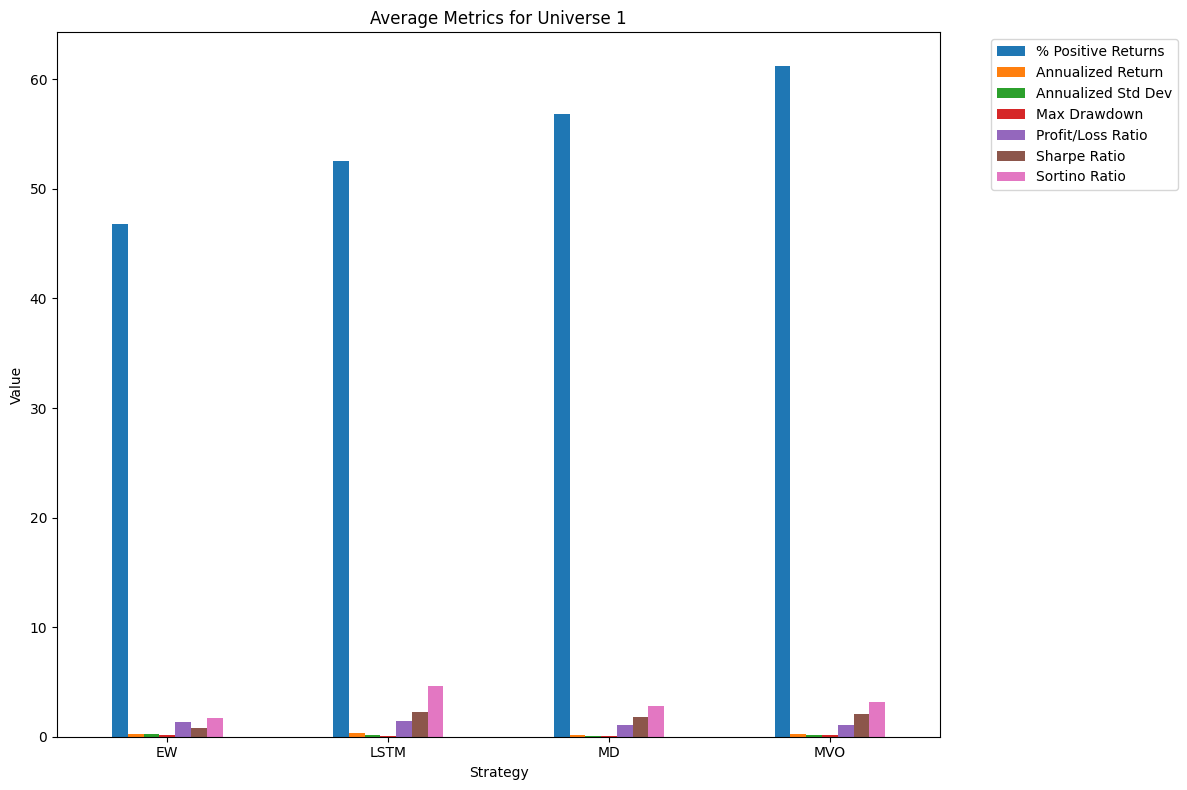

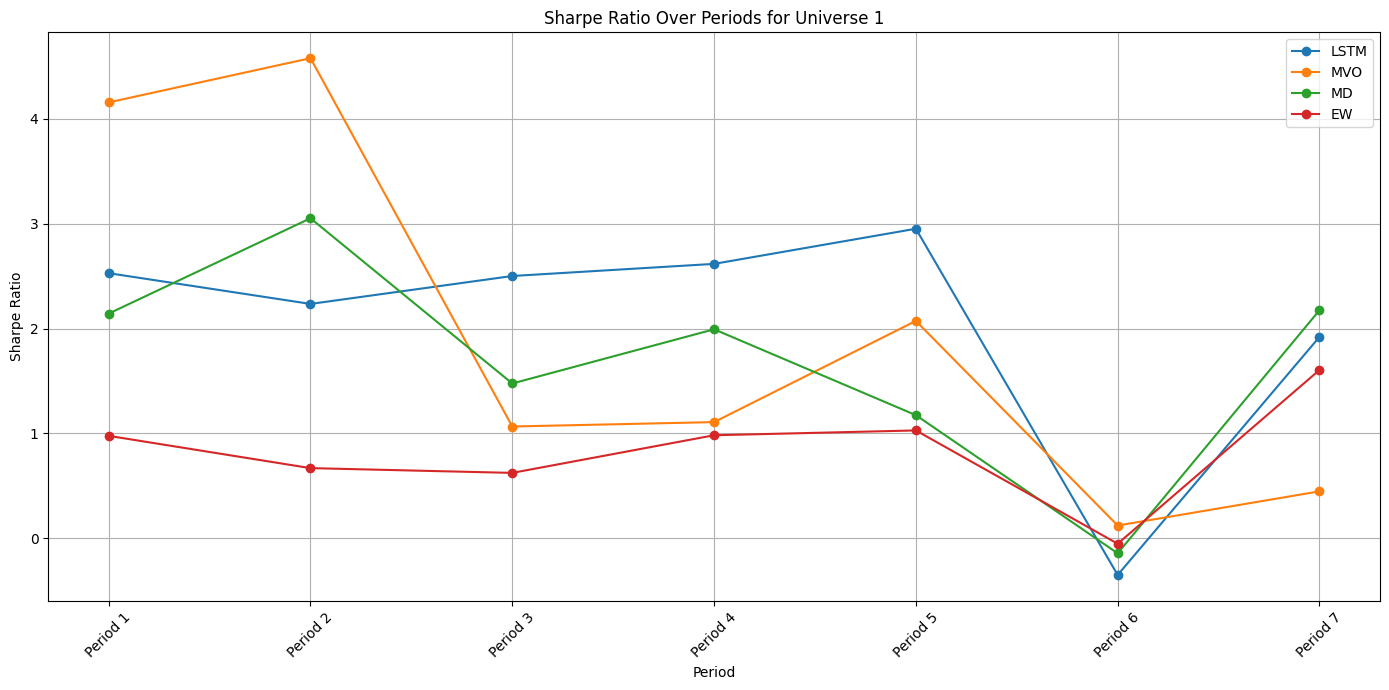

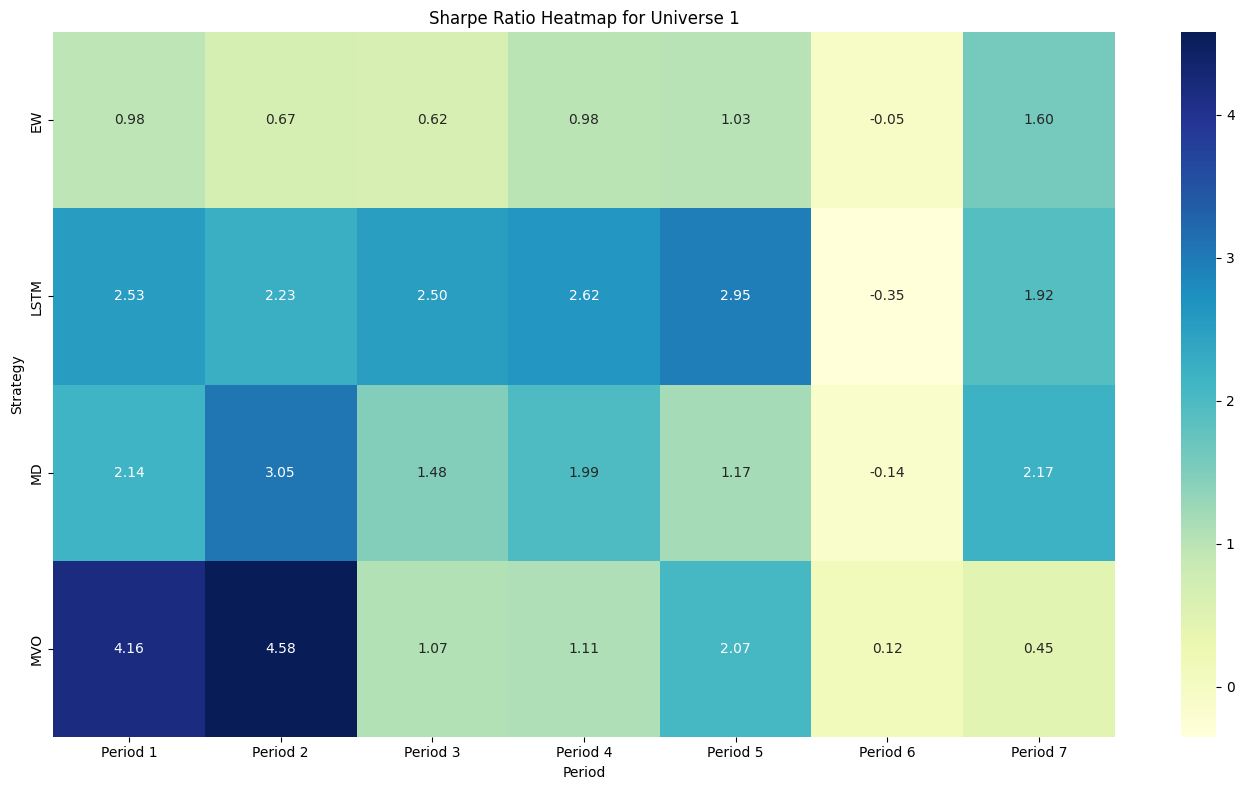

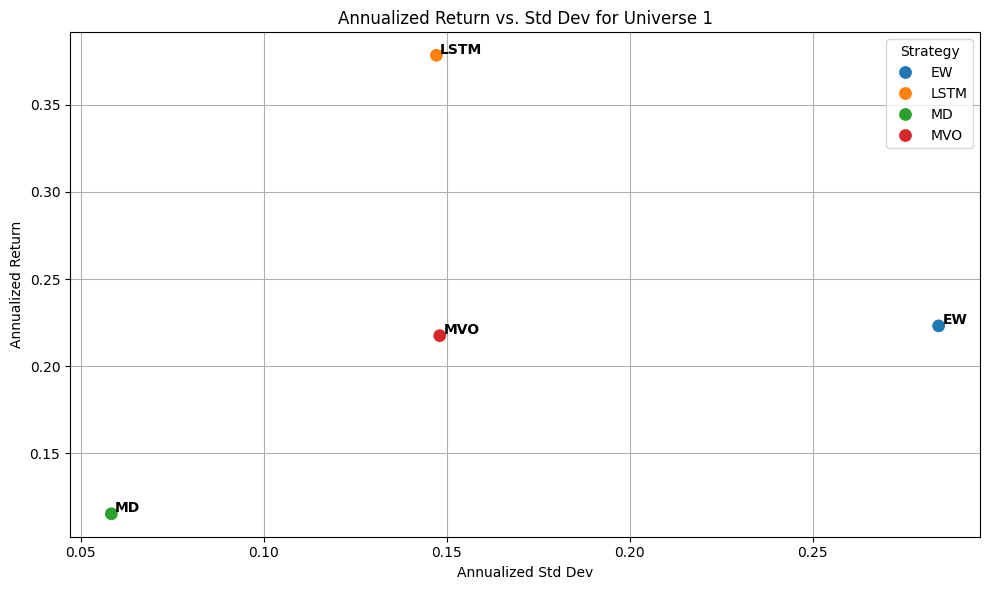


--- Universe 2 ---


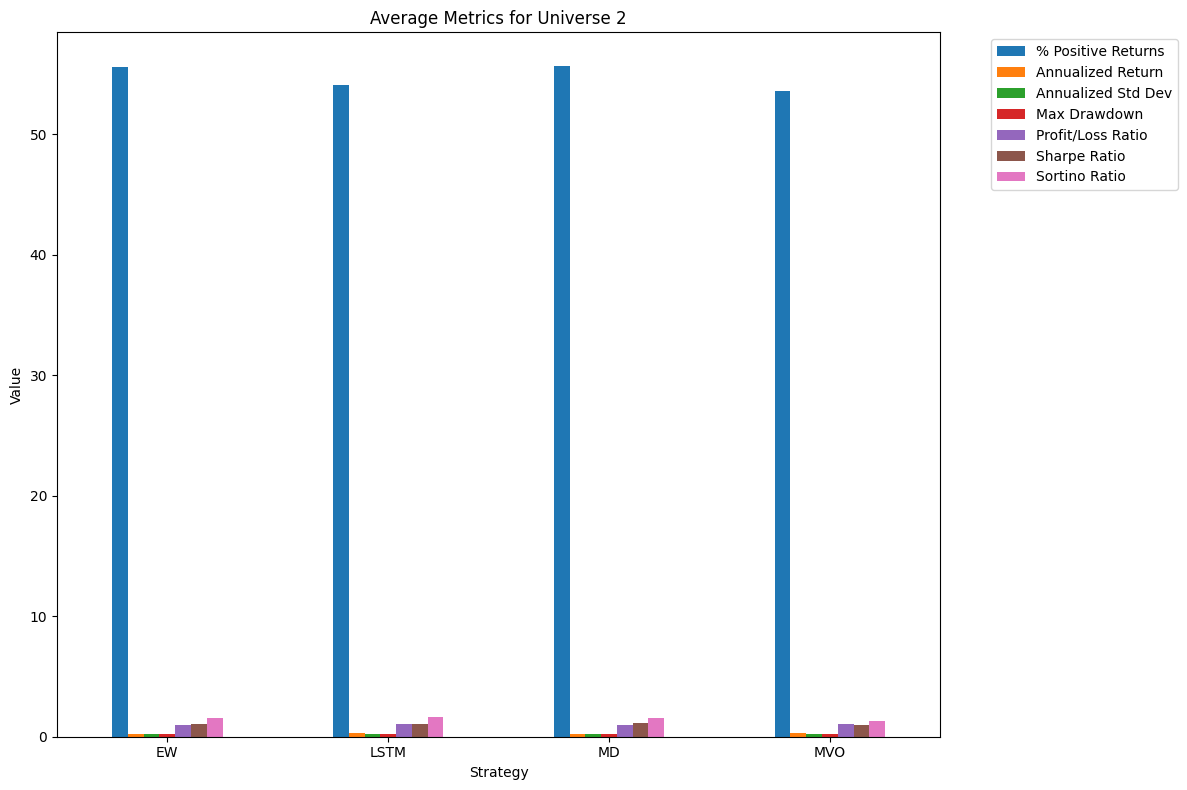

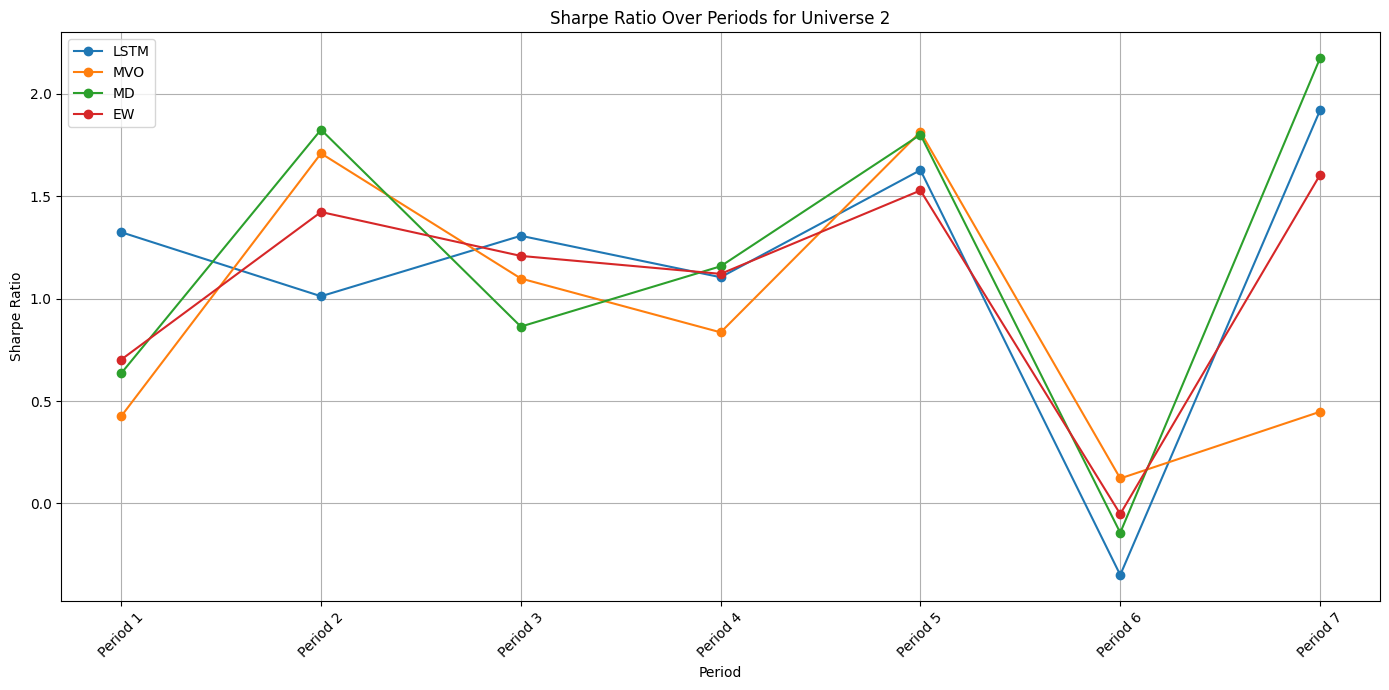

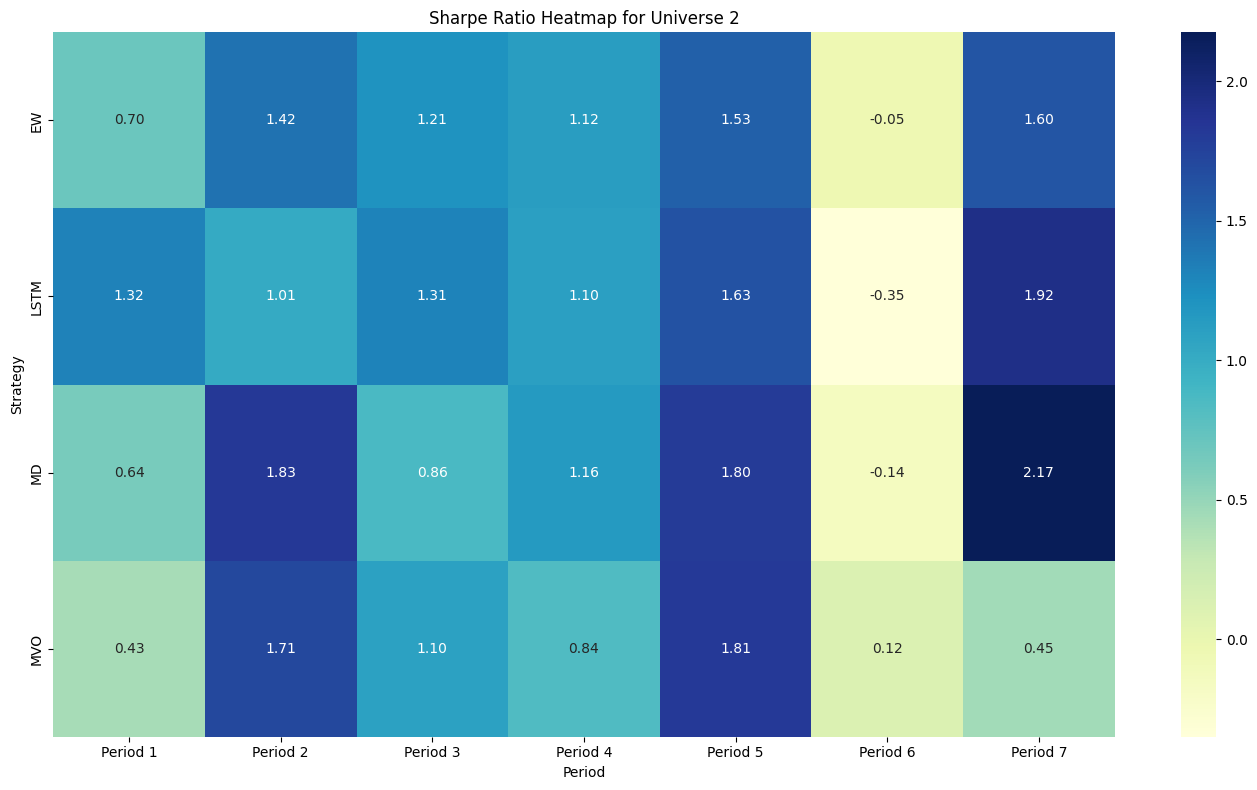

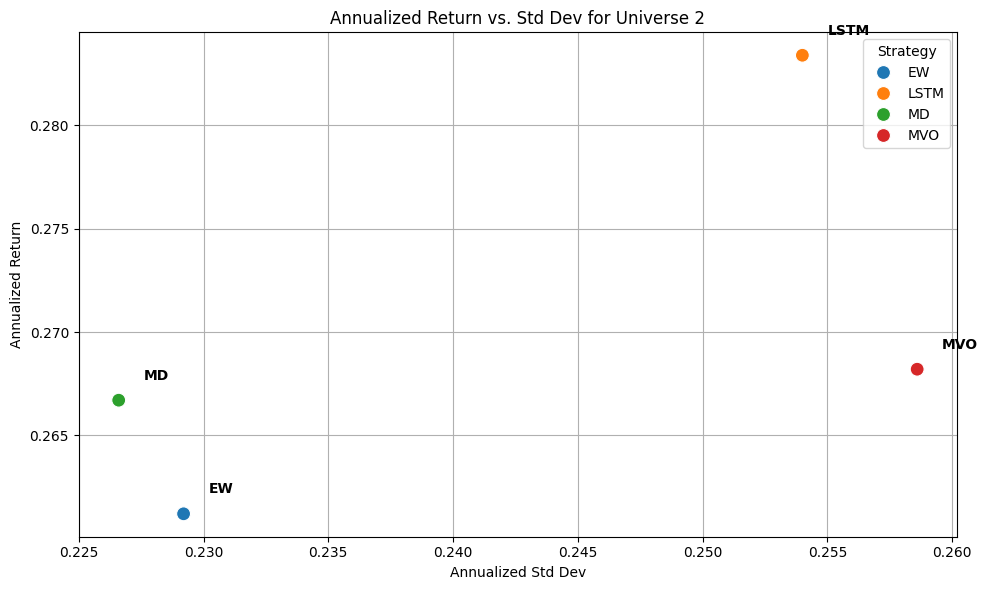


--- Universe 3 ---


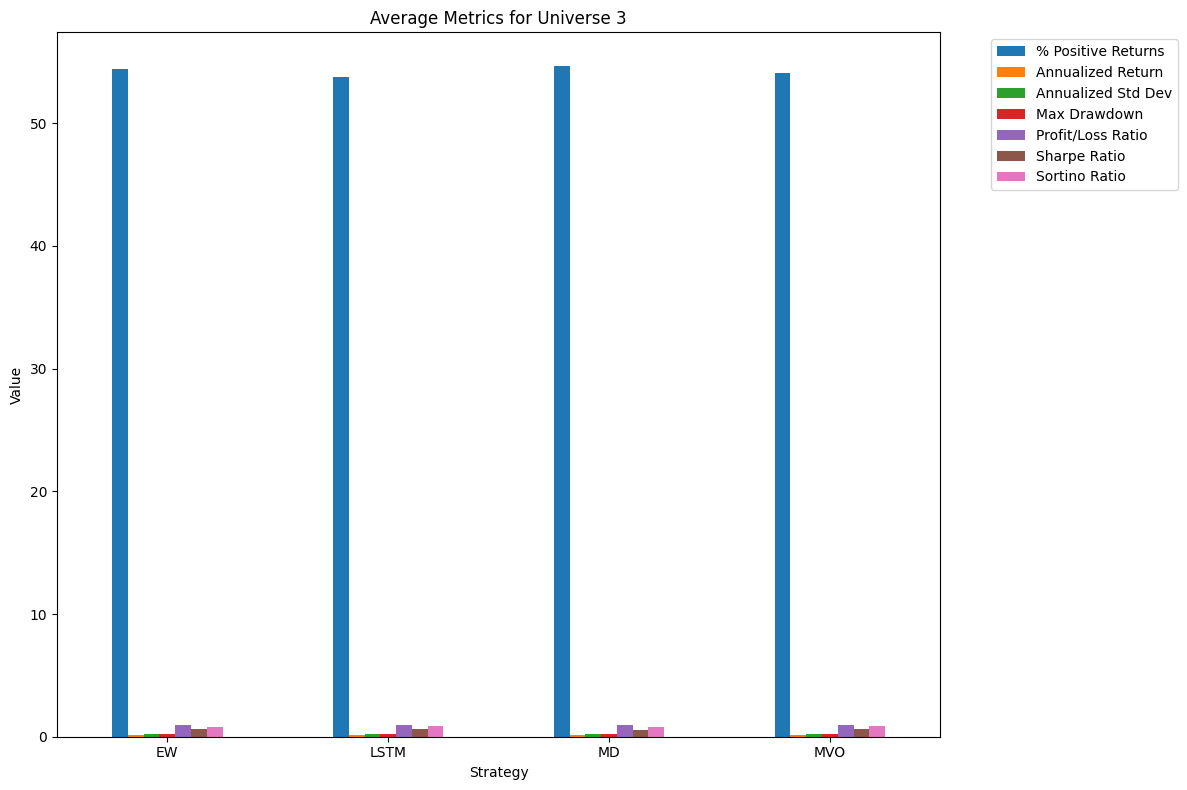

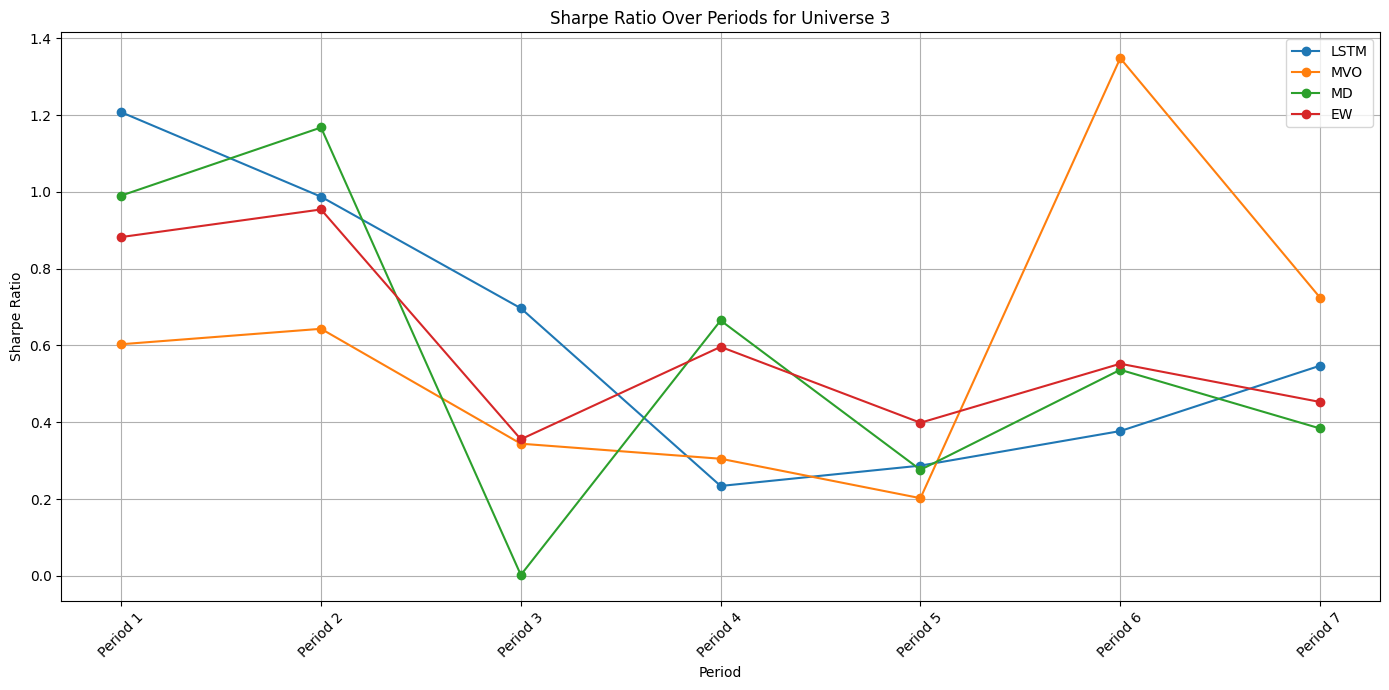

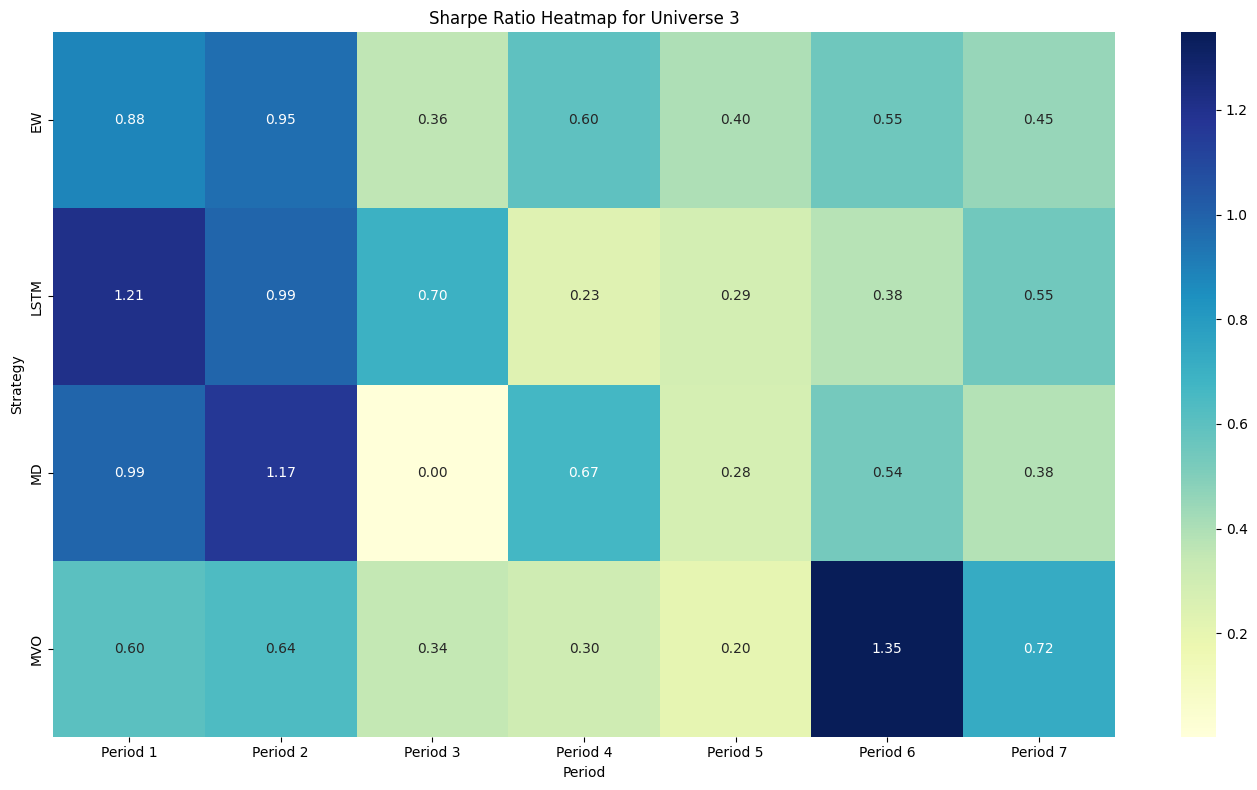

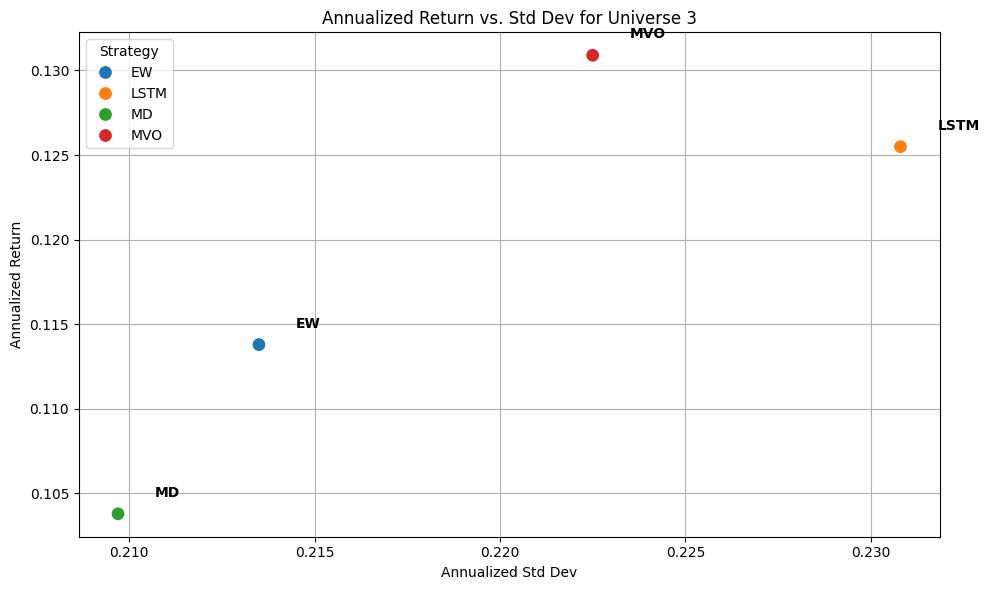


--- Universe 4 ---


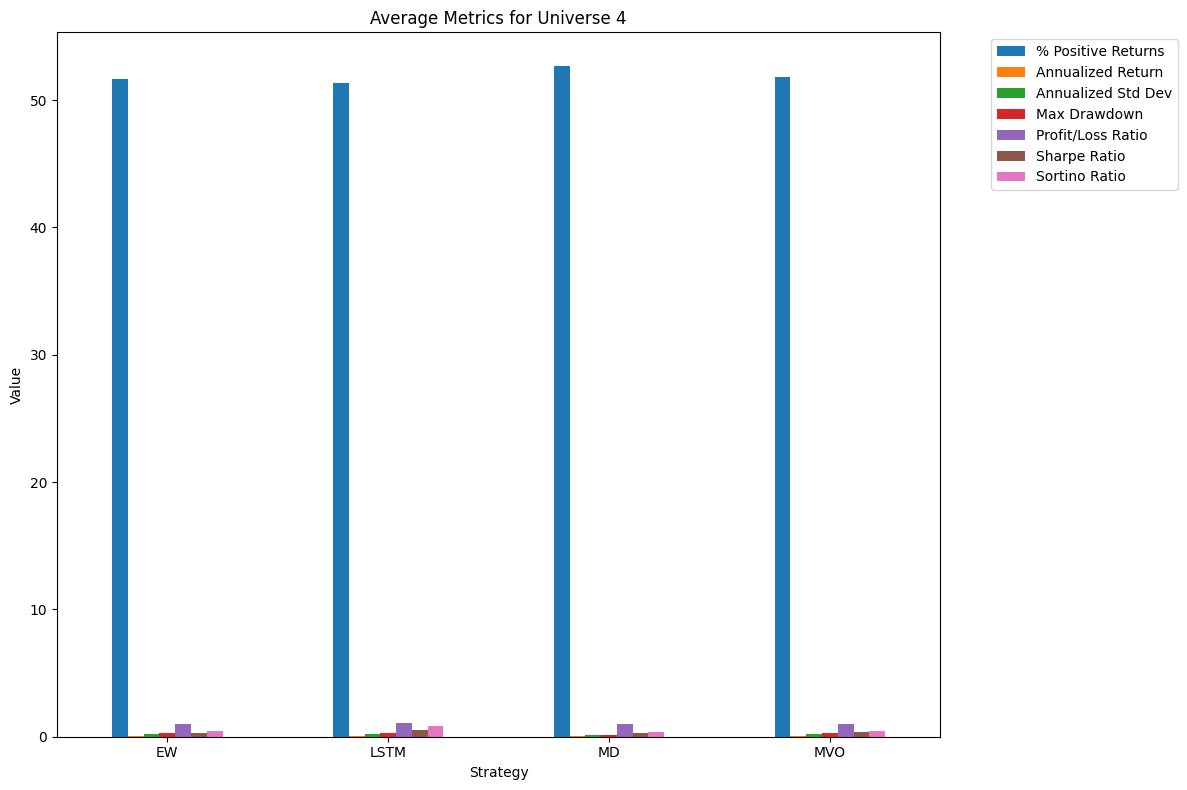

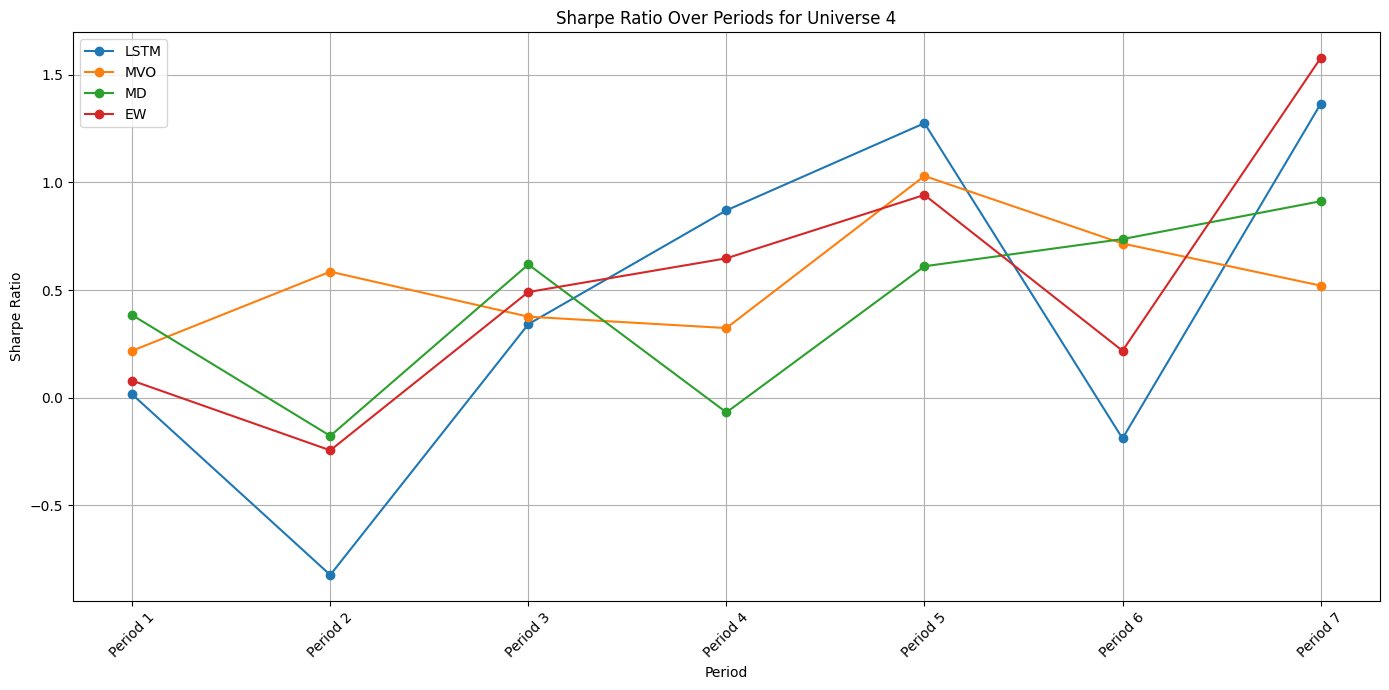

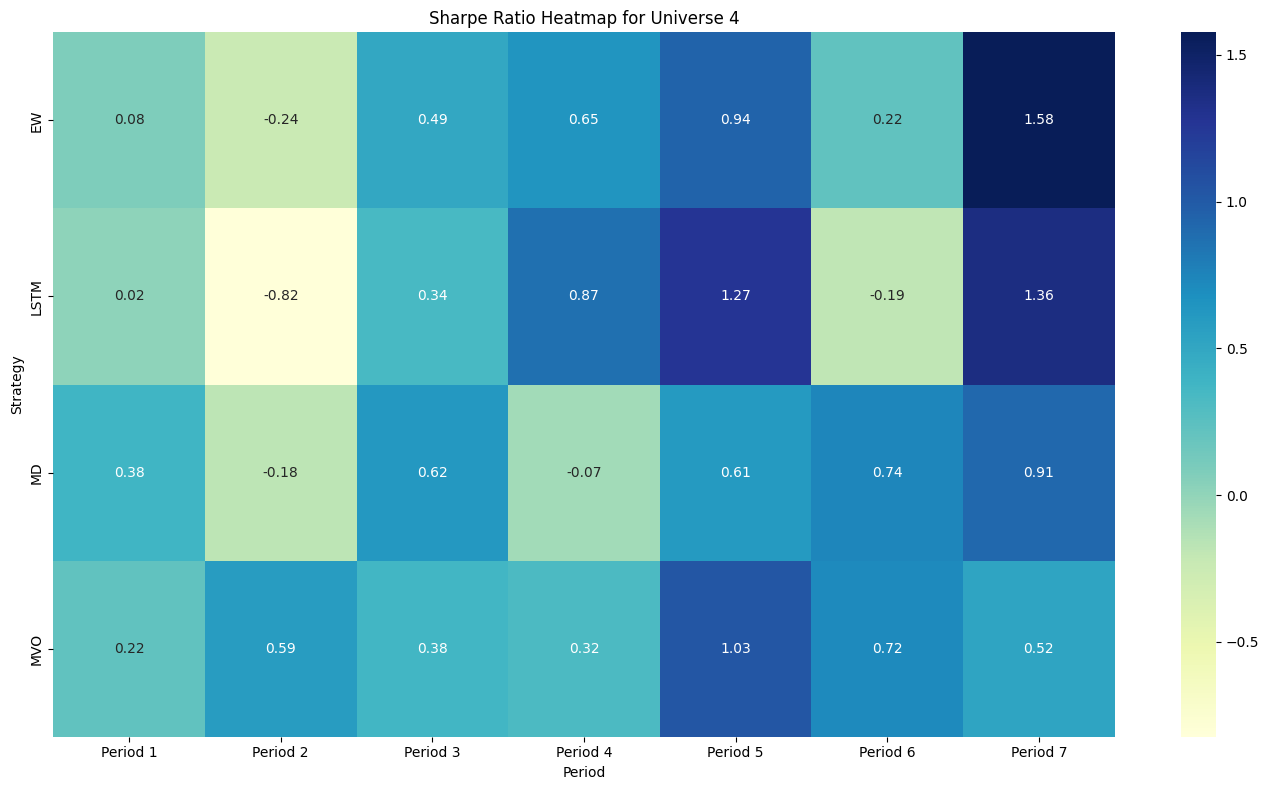

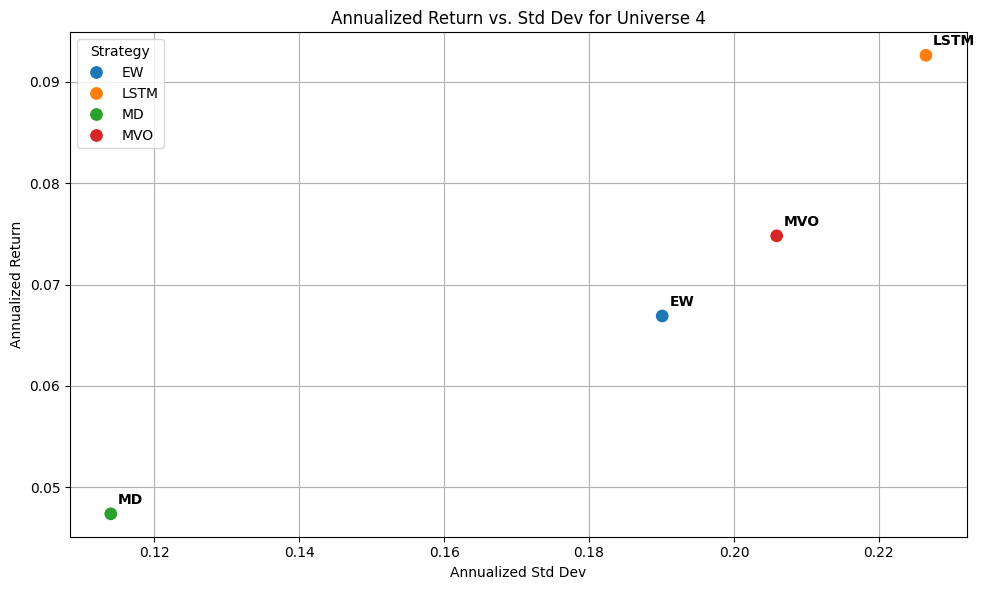


--- Universe 5 ---


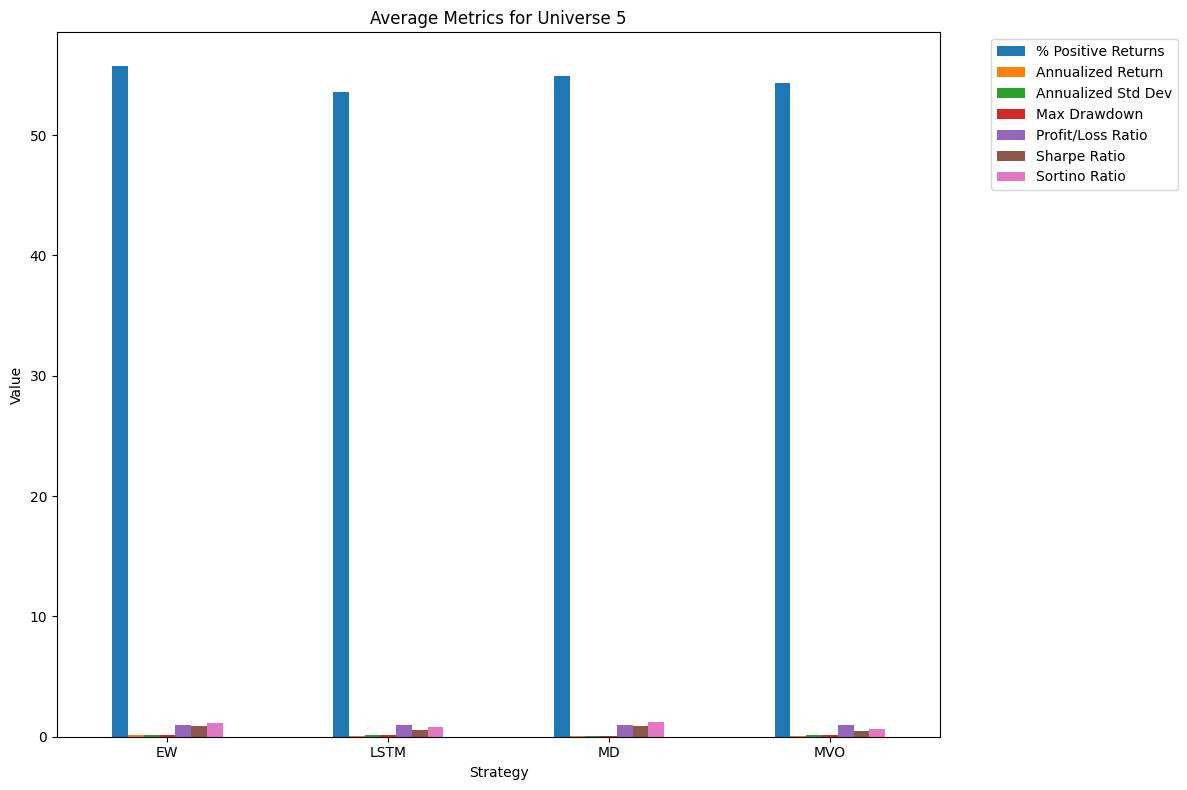

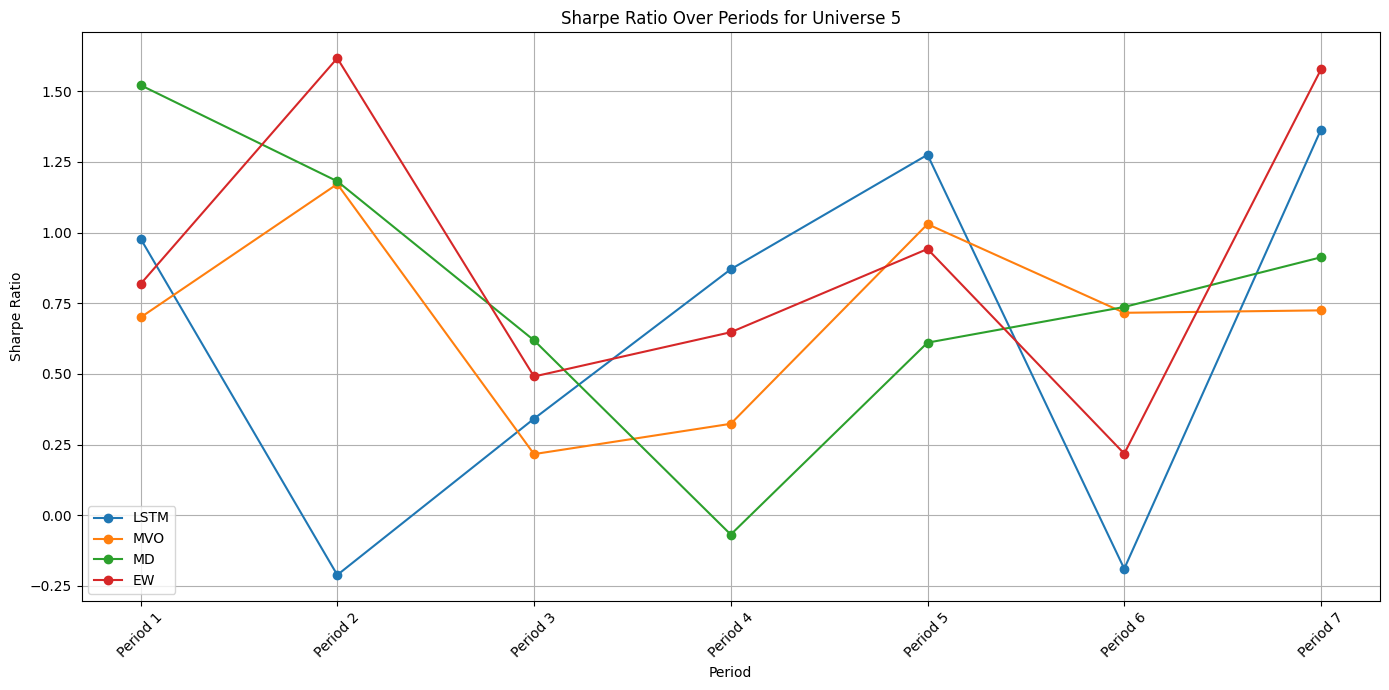

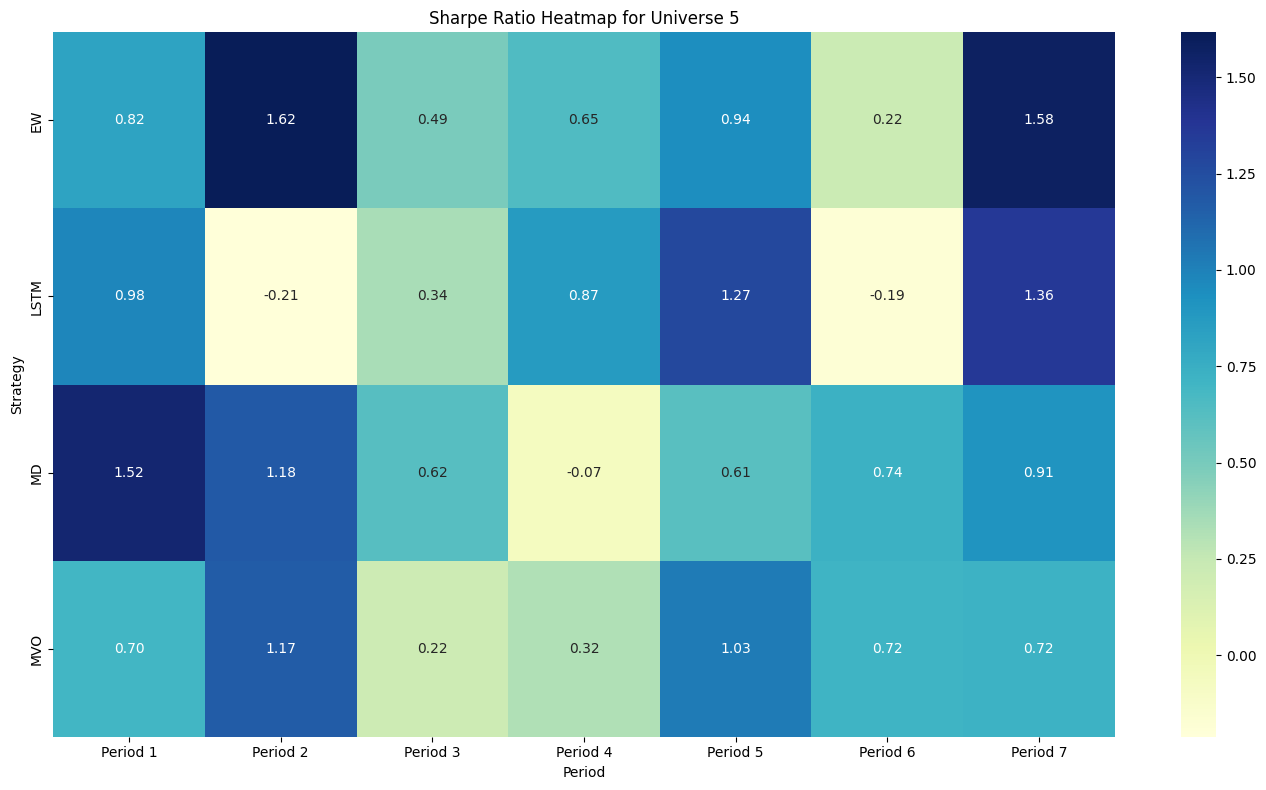

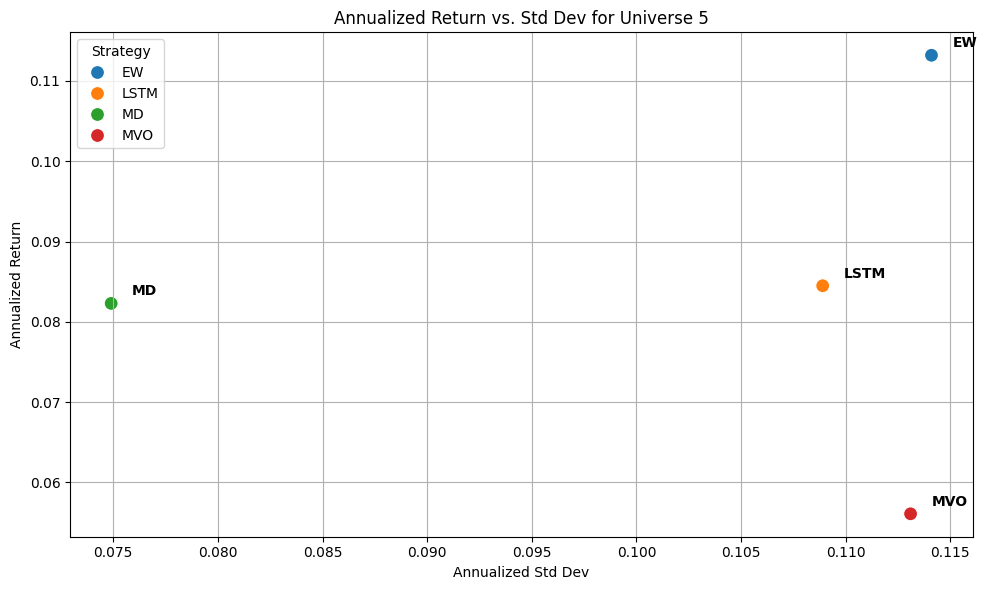


--- Universe 6 ---


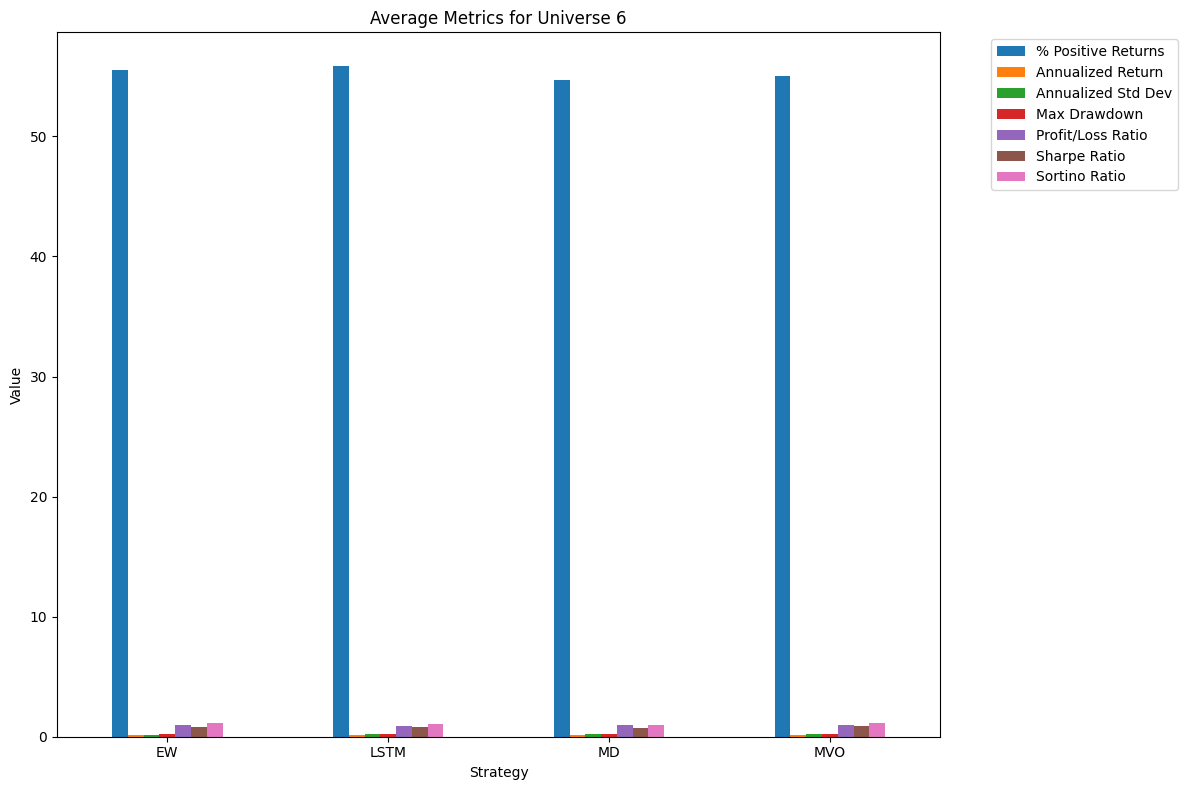

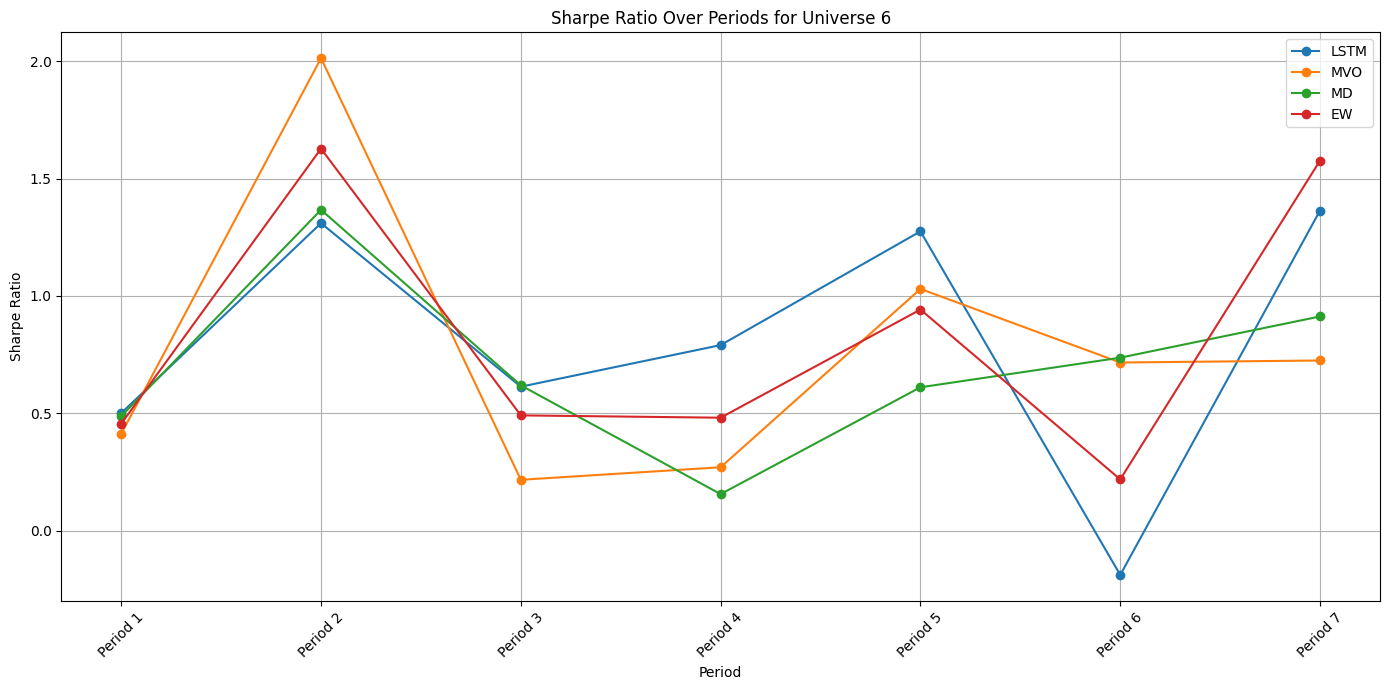

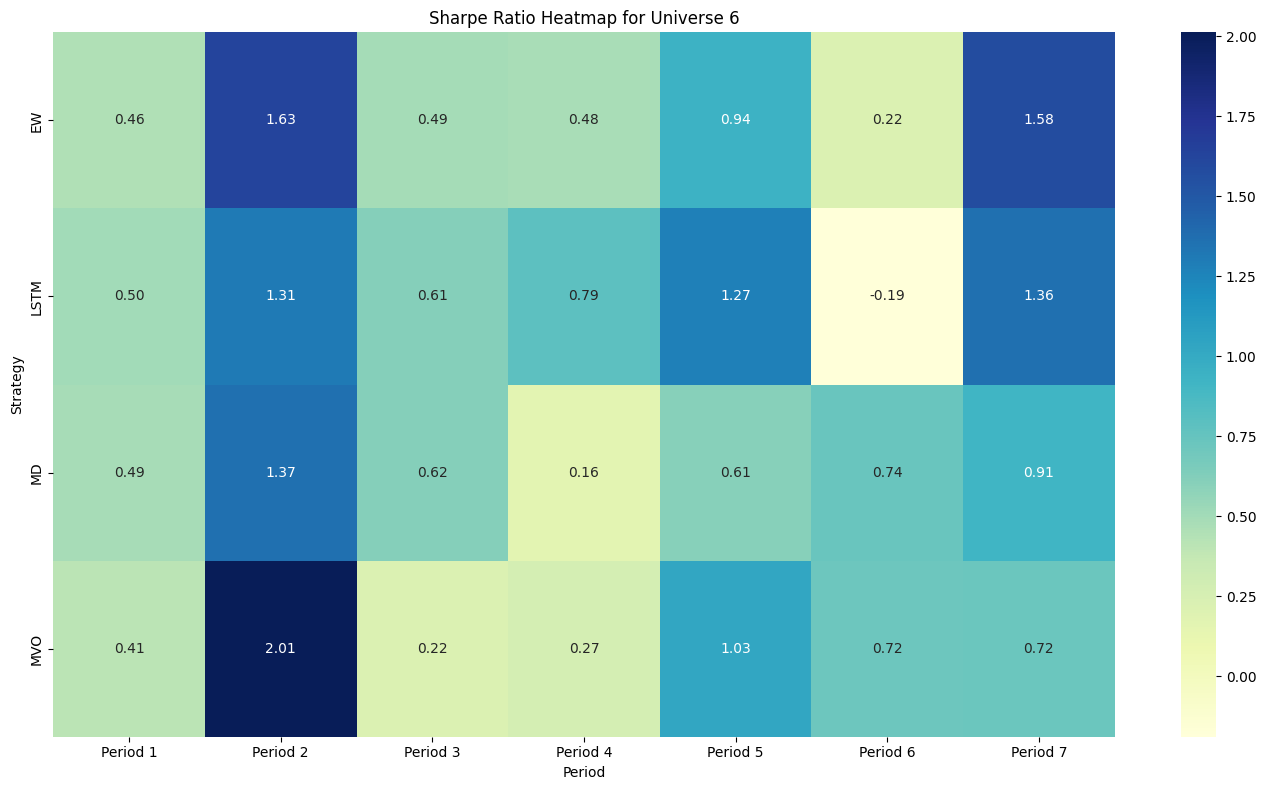

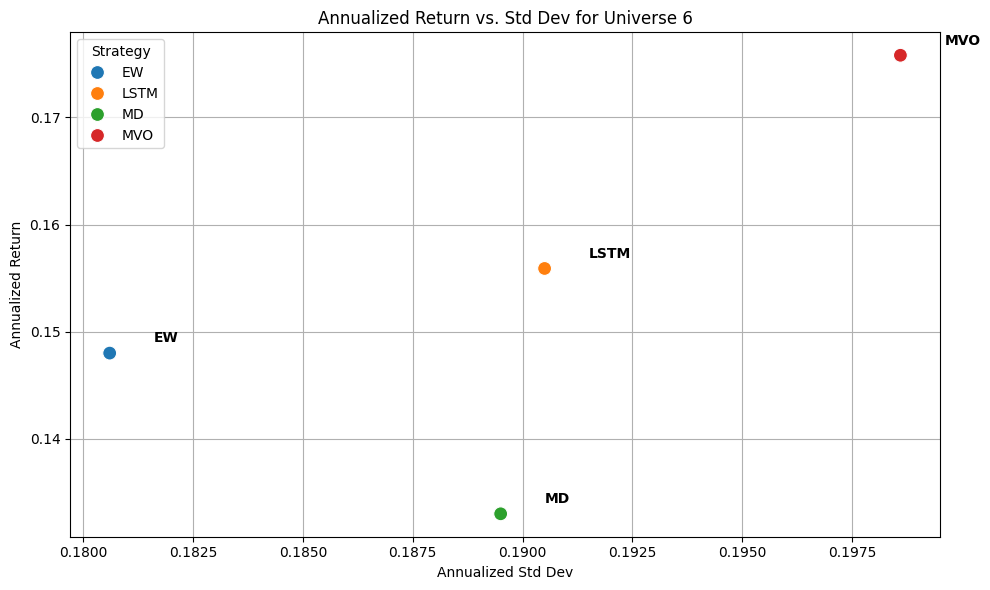

In [58]:
metrics_to_plot = ['Annualized Return', 'Annualized Std Dev', 'Sharpe Ratio', 
                  'Sortino Ratio', 'Max Drawdown', '% Positive Returns', 'Profit/Loss Ratio']

# List of strategies
strategies = ['LSTM', 'MVO', 'MD', 'EW']

# Plot for each universe
for universe in combined_df['Universe'].unique():
    print(f"\n--- {universe} ---")
    
    # 1. Plot Average Metrics
    plot_average_metrics(combined_df, universe, metrics_to_plot)
    
    # 2. Plot Sharpe Ratio Over Periods
    plot_period_metrics(combined_df, universe, 'Sharpe Ratio', strategies)
    
    # 3. Plot Sharpe Ratio Heatmap
    plot_sharpe_heatmap(combined_df, universe)
    
    # 4. Scatter Plot of Annualized Return vs. Std Dev
    scatter_return_vs_std(combined_df, universe)

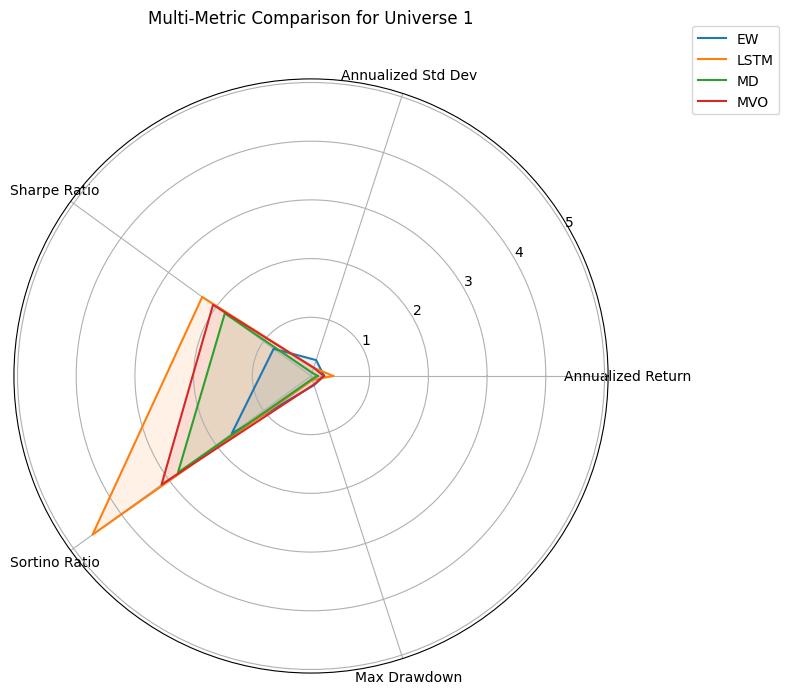

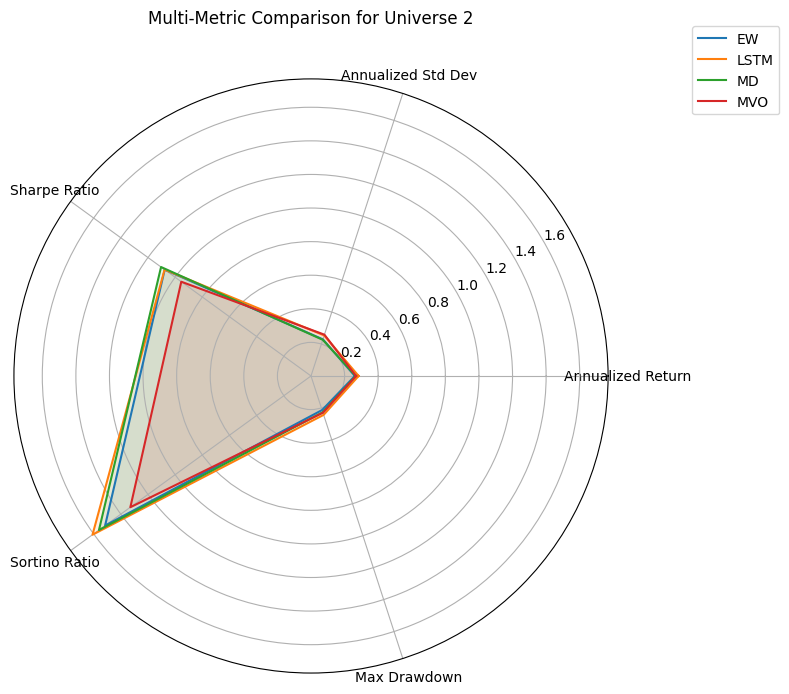

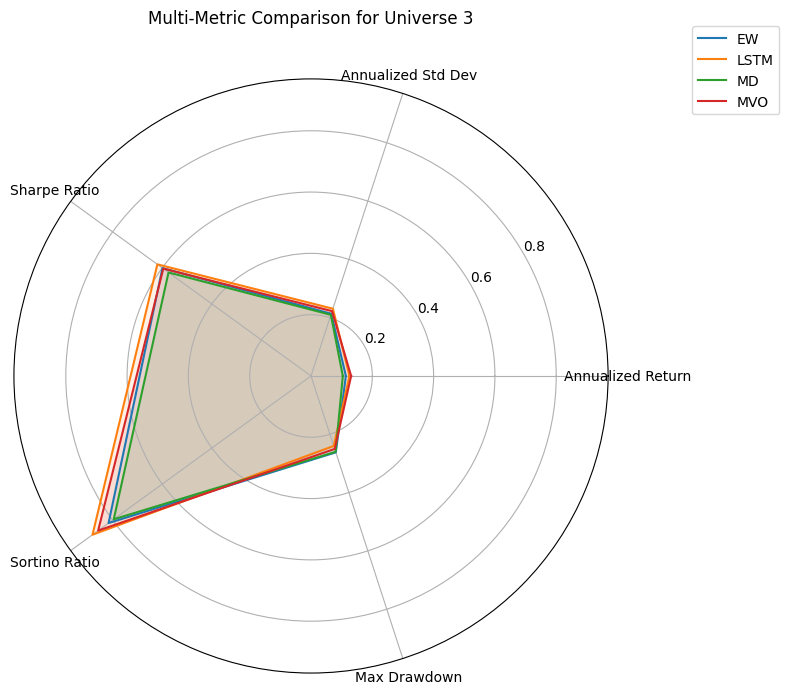

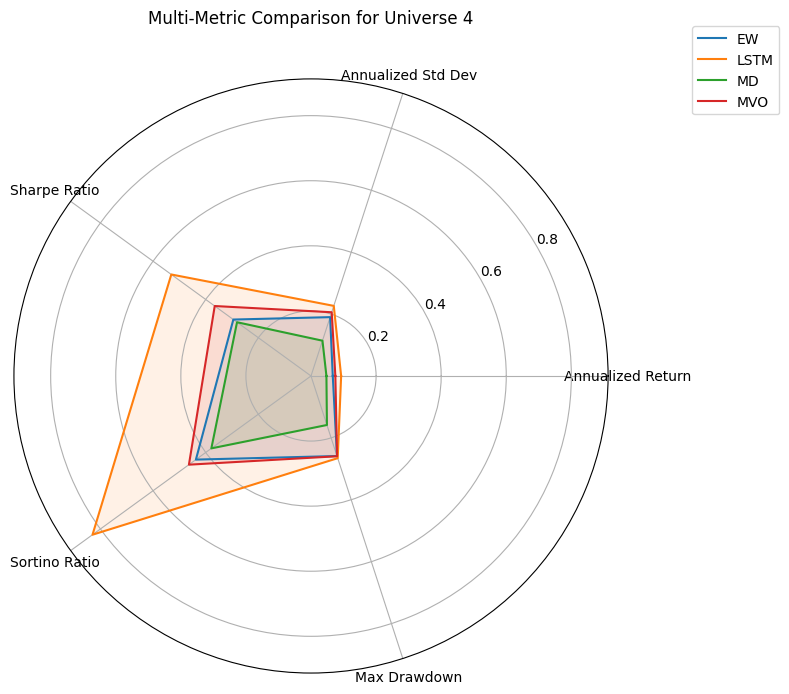

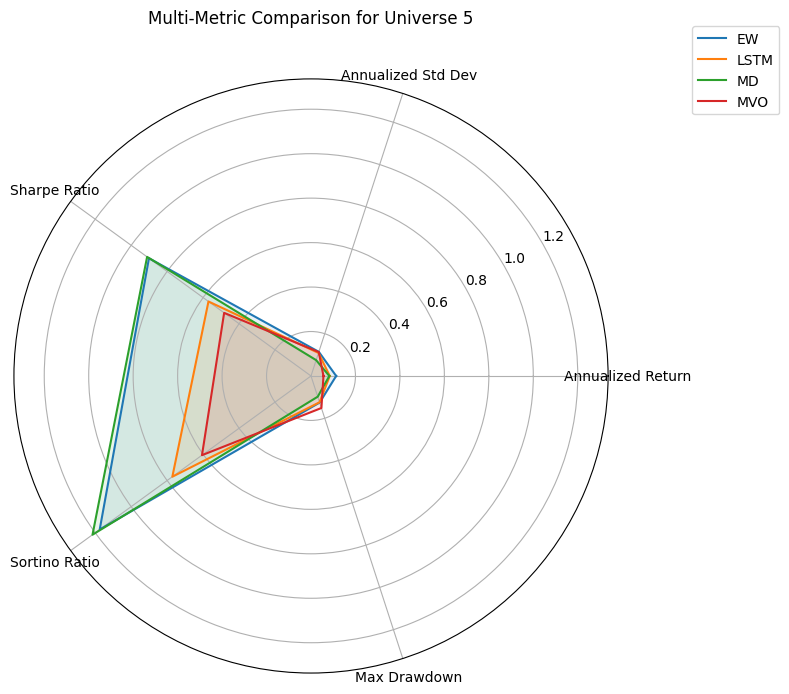

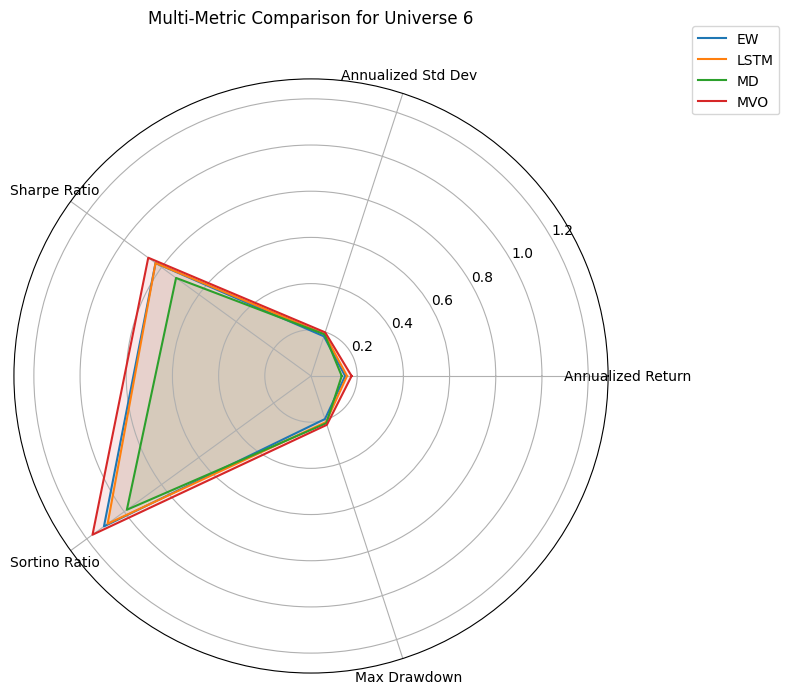

In [59]:
metrics = [
    'Annualized Return', 
    'Annualized Std Dev', 
    'Sharpe Ratio', 
    'Sortino Ratio', 
    'Max Drawdown'
]
radar_chart_average_metrics(combined_df, 'Universe 1', metrics)
radar_chart_average_metrics(combined_df, 'Universe 2', metrics)
radar_chart_average_metrics(combined_df, 'Universe 3', metrics)
radar_chart_average_metrics(combined_df, 'Universe 4', metrics)
radar_chart_average_metrics(combined_df, 'Universe 5', metrics)
radar_chart_average_metrics(combined_df, 'Universe 6', metrics)


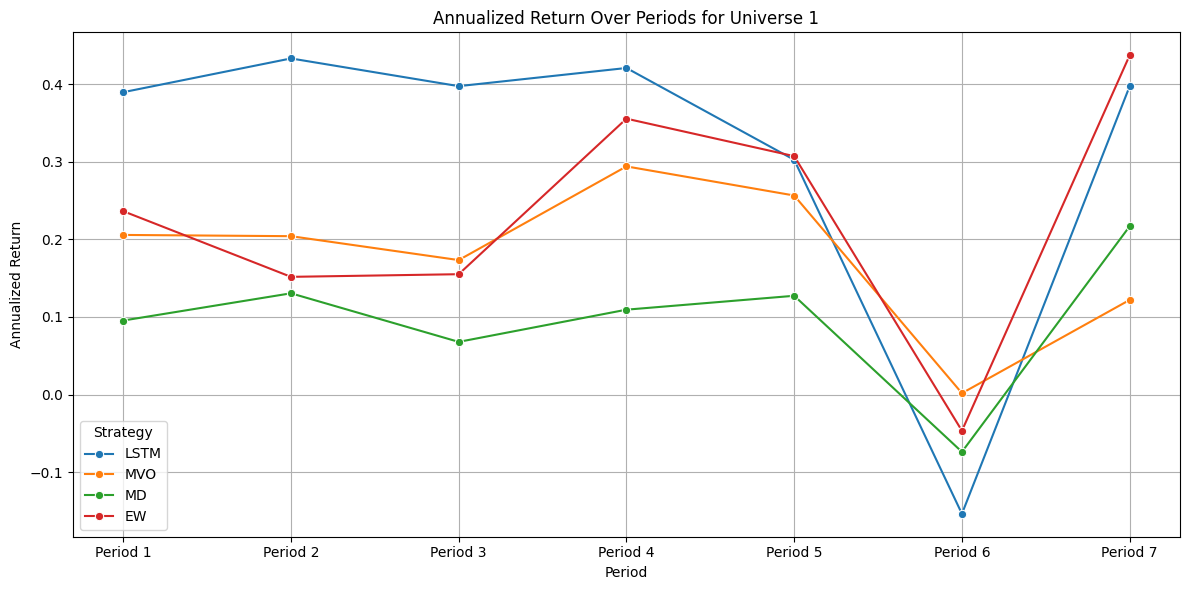

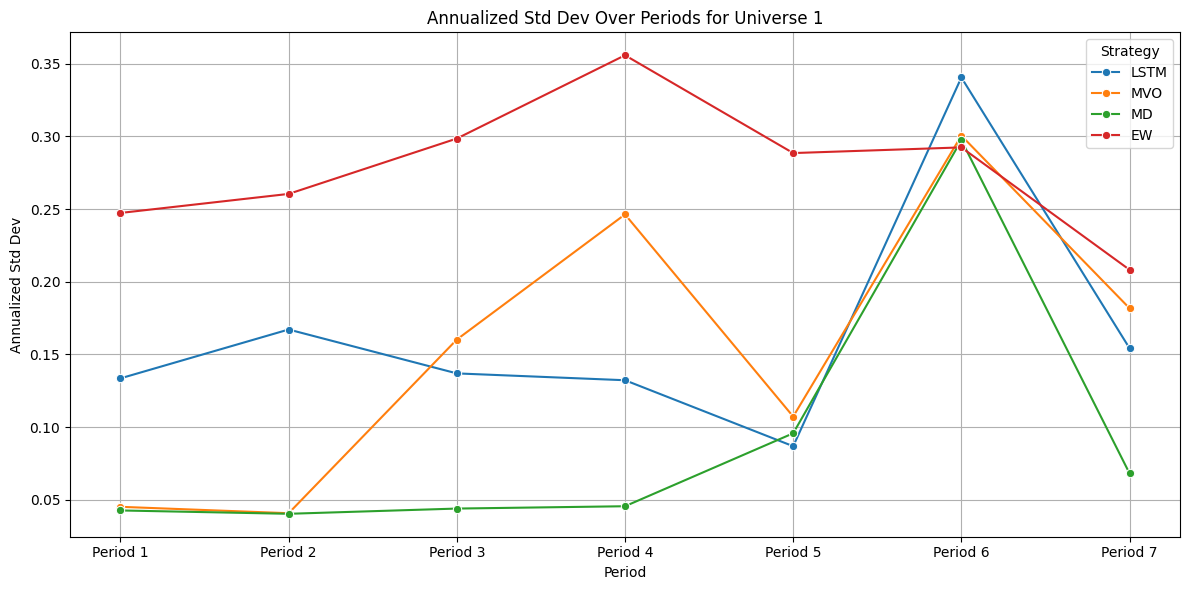

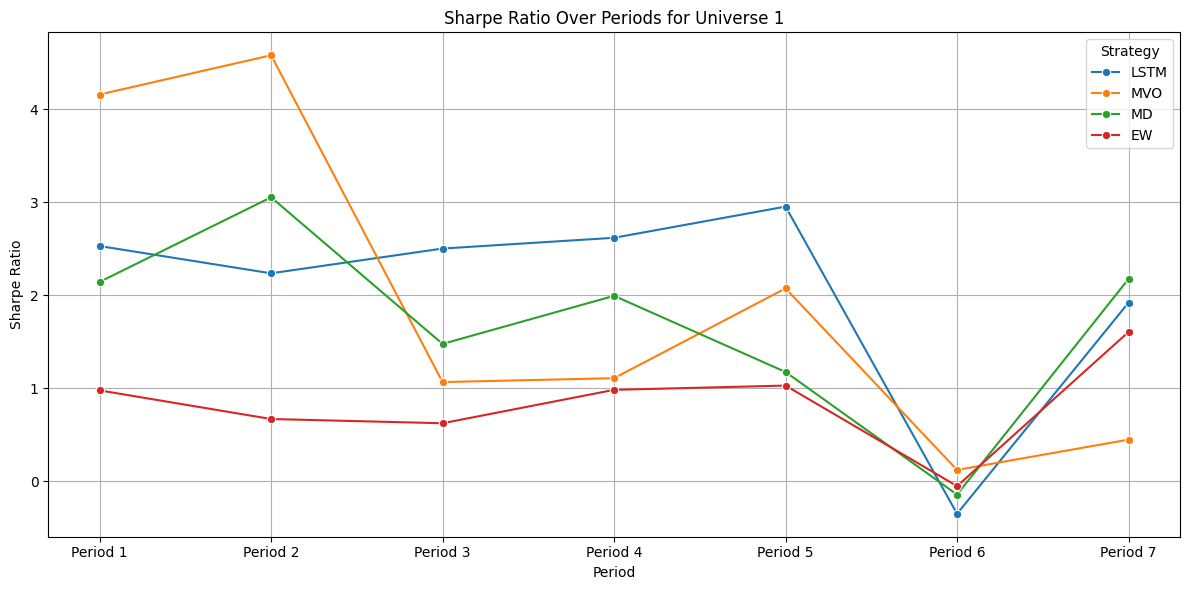

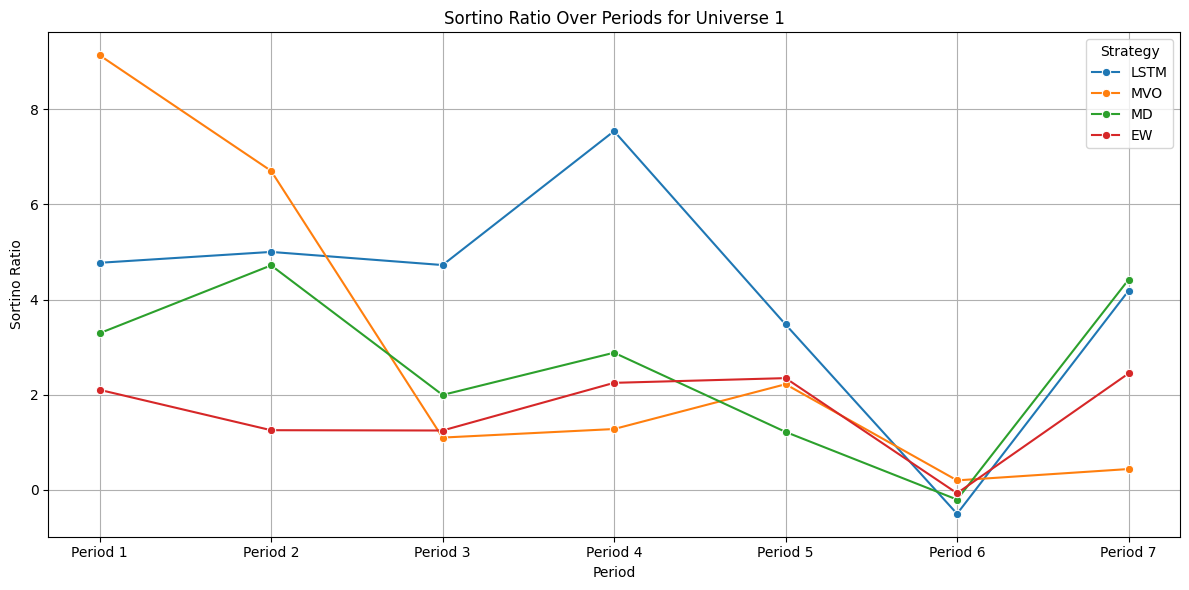

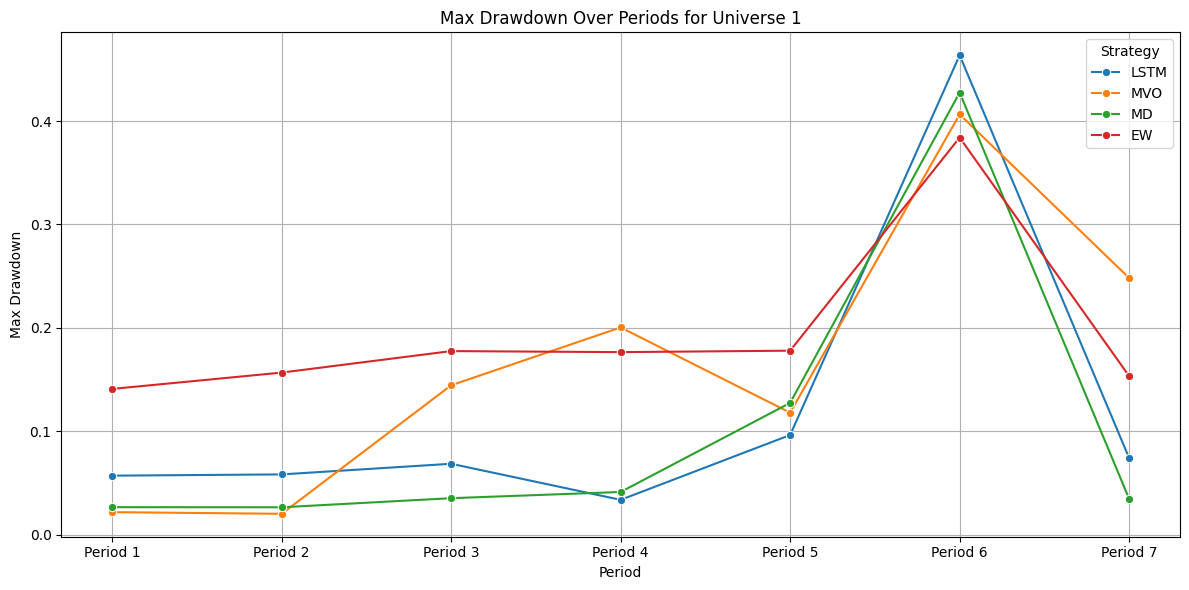

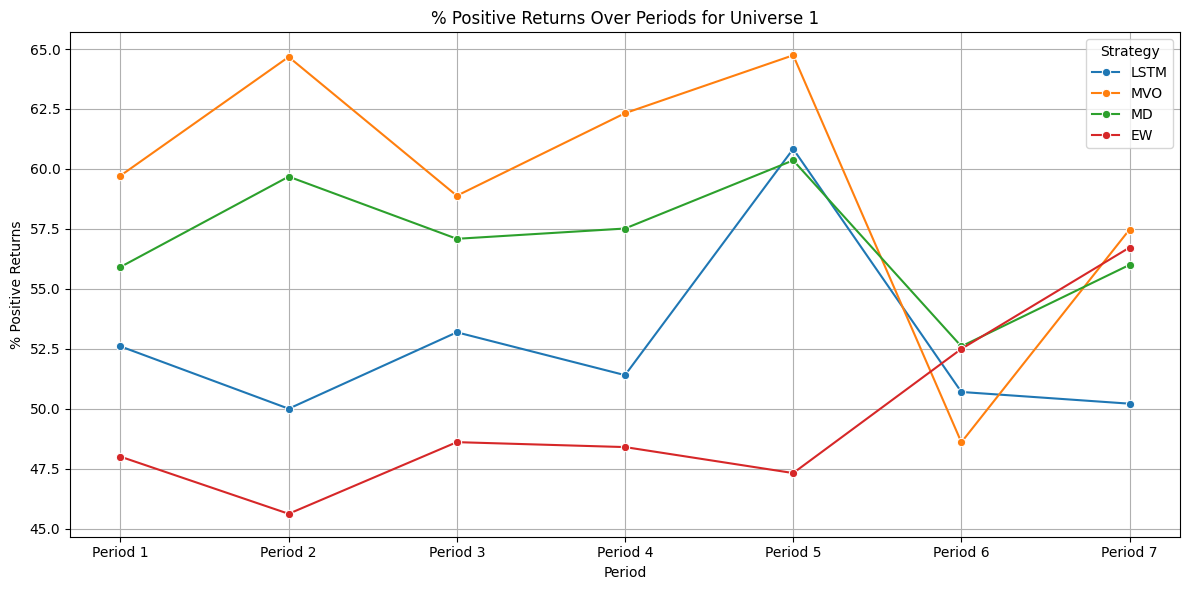

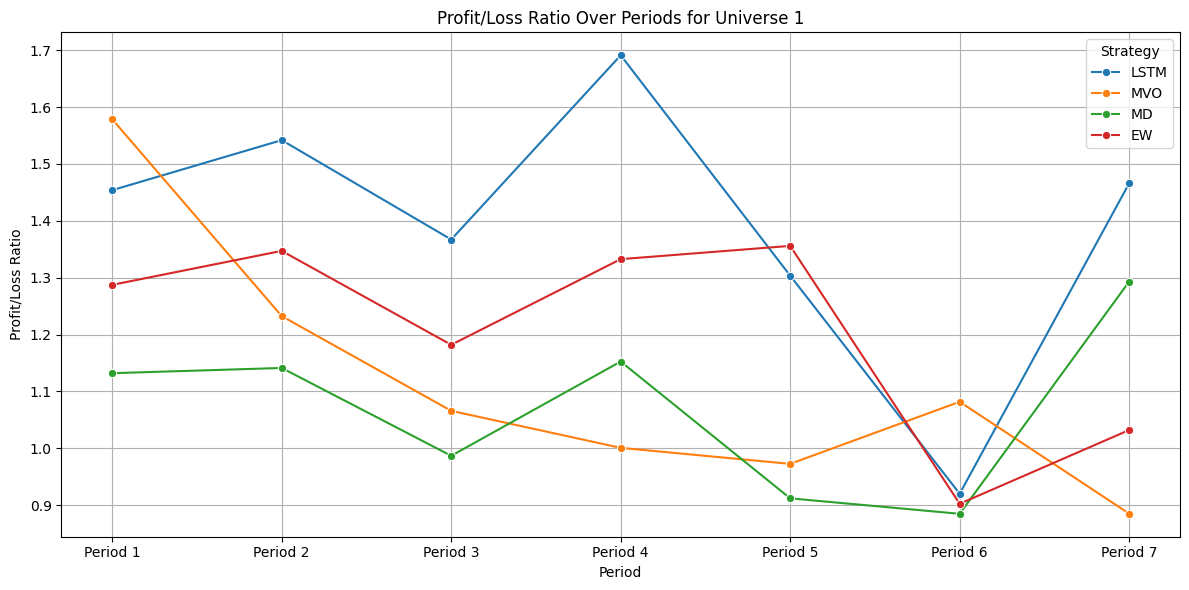

In [60]:
metrics_to_plot = [
    'Annualized Return', 
    'Annualized Std Dev', 
    'Sharpe Ratio', 
    'Sortino Ratio', 
    'Max Drawdown', 
    '% Positive Returns', 
    'Profit/Loss Ratio'
]
strategies = ['LSTM', 'MVO', 'MD', 'EW']

plot_metrics_over_periods(combined_df, 'Universe 1', metrics_to_plot, strategies)